Dataset Overview:
                                  name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN  
The range of selling prices is: 5000 to 760000


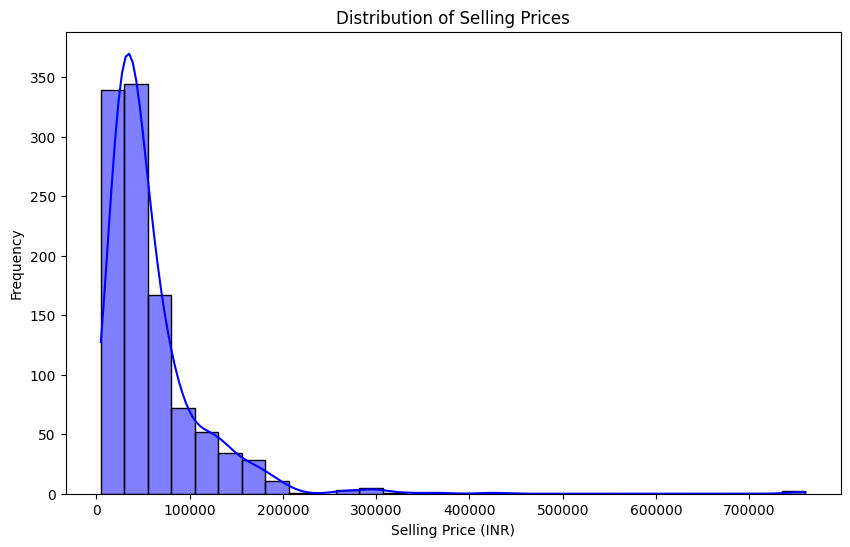

In [1]:


# EDA Assignment

# EDA-1

# Q-1  What is the range of selling prices in the dataset

# Import necessary libraries
import pandas as pd           # For data handling and manipulation
import numpy as np            # For numerical computations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns         # For enhanced visualizations

# Load the dataset with the  file path
file_path = "/content/BIKE DETAILS.csv"  #  path to your dataset
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()

# Check the dataset structure
print("Dataset Overview:")
print(data.head())

# Verify that the 'selling_price' column exists in the dataset
if 'selling_price' not in data.columns:
    print("Error: 'selling_price' column not found in the dataset")
    exit()

# Find the range of selling prices
try:
    min_price = data['selling_price'].min()
    max_price = data['selling_price'].max()
    print(f"The range of selling prices is: {min_price} to {max_price}")
except Exception as e:
    print(f"Error calculating selling price range: {e}")
    exit()

# Optional: Visualize the distribution of selling prices
try:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['selling_price'], bins=30, kde=True, color='blue')
    plt.title('Distribution of Selling Prices')
    plt.xlabel('Selling Price (INR)')
    plt.ylabel('Frequency')
    plt.show()
except Exception as e:
    print(f"Error in visualization: {e}")






In [2]:

# Q-2 What is the median selling price for bikes in the dataset

# Calculate the median selling price
try:
    median_price = data['selling_price'].median()
    print(f"The median selling price for bikes in the dataset is: {median_price}")
except KeyError:
    print("Error: 'selling_price' column is not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The median selling price for bikes in the dataset is: 45000.0


In [3]:
# Q-3  What is the most common seller type?

# Determine the most common seller type
try:
    most_common_seller_type = data['seller_type'].mode()[0]
    print(f"The most common seller type in the dataset is: {most_common_seller_type}")
except KeyError:
    print("Error: 'seller_type' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred while finding the mode: {e}")


The most common seller type in the dataset is: Individual


In [4]:
# Q-4 How many bikes have driven more than 50,000 kilometers?

# Count the number of bikes with km_driven > 50,000
try:
    bikes_over_50k = data[data['km_driven'] > 50000].shape[0]
    print(f"The number of bikes that have driven more than 50,000 kilometers is: {bikes_over_50k}")
except KeyError:
    print("Error: 'km_driven' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The number of bikes that have driven more than 50,000 kilometers is: 170


In [5]:

# Q-5-  What is the average km_driven value for each ownership type?

# Calculate the average km_driven for each ownership type
try:
    avg_km_by_owner = data.groupby('owner')['km_driven'].mean()
    print("Average km_driven value for each ownership type:")
    print(avg_km_by_owner)
except KeyError:
    print("Error: 'owner' or 'km_driven' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Average km_driven value for each ownership type:
owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [6]:
# Q-6 What proportion of bikes are from the year 2015 or older?

# Calculate the proportion of bikes from 2015 or older
try:
    total_bikes = data.shape[0]  # Total number of bikes
    bikes_2015_or_older = data[data['year'] <= 2015].shape[0]  # Bikes from 2015 or older
    proportion = (bikes_2015_or_older / total_bikes) * 100  # Proportion in percentage
    print(f"The proportion of bikes from the year 2015 or older is: {proportion:.2f}%")
except KeyError:
    print("Error: 'year' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The proportion of bikes from the year 2015 or older is: 56.64%


Missing Values by Column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of Missing Values by Column:
name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


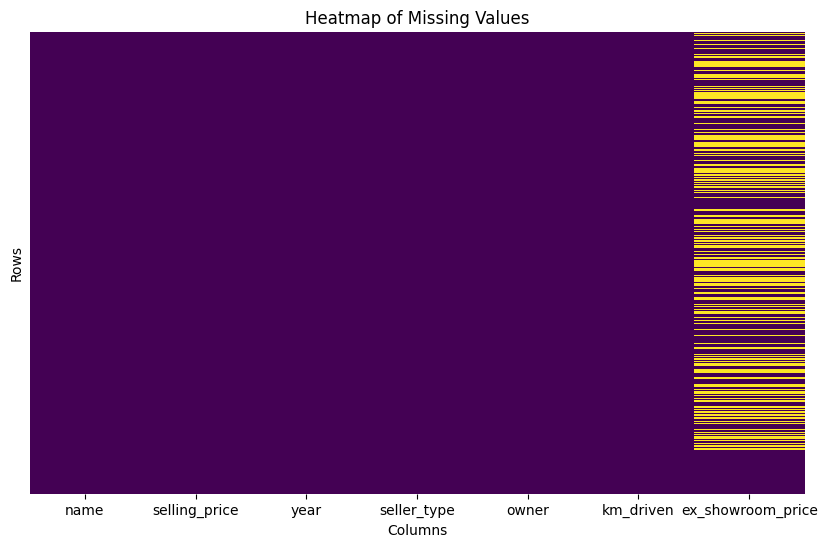

In [7]:
# Q-7-What is the trend of missing values across the dataset?

# Check for missing values in each column
print("Missing Values by Column:")
missing_values = data.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / data.shape[0]) * 100
print("\nPercentage of Missing Values by Column:")
print(missing_percentage)

# Visualize the missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


In [8]:
# Q  What is the highest ex_showroom_price recorded, and for which bike?

# Find the bike with the highest ex_showroom_price
try:
    highest_price_row = data.loc[data['ex_showroom_price'].idxmax()]
    bike_name = highest_price_row['name']
    highest_price = highest_price_row['ex_showroom_price']
    print(f"The highest ex_showroom_price recorded is {highest_price}, and it belongs to the bike: {bike_name}")
except KeyError:
    print("Error: 'ex_showroom_price' or 'name' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The highest ex_showroom_price recorded is 1278000.0, and it belongs to the bike: Harley-Davidson Street Bob


In [9]:

# Q-9 What is the total number of bikes listed by each seller type?

# Count the total number of bikes listed by each seller type
try:
    seller_type_counts = data['seller_type'].value_counts()
    print("Total number of bikes listed by each seller type:")
    print(seller_type_counts)
except KeyError:
    print("Error: 'seller_type' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Total number of bikes listed by each seller type:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


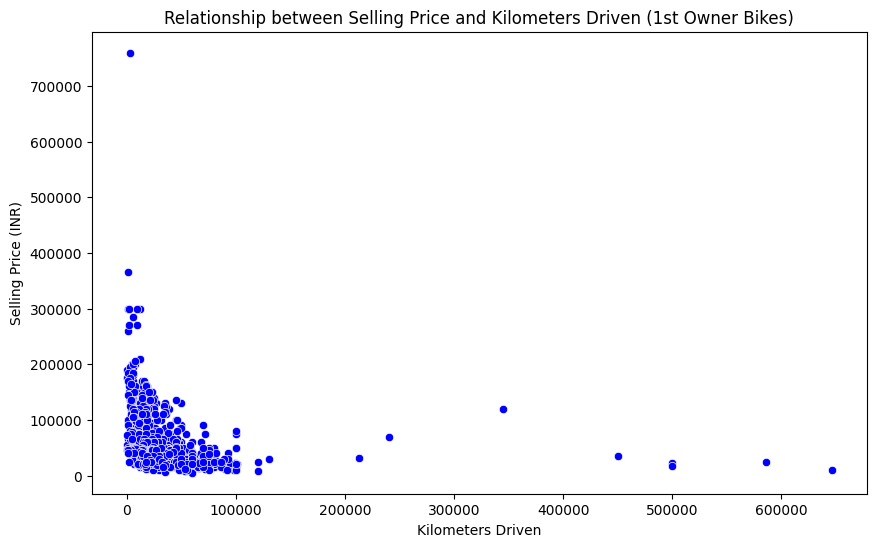

The correlation coefficient between selling price and kilometers driven for first-owner bikes is: -0.24


In [10]:

# Q-10 What is the relationship between selling_price and km_driven for first-owner bikes?

# Filter the dataset for first-owner bikes
try:
    first_owner_bikes = data[data['owner'] == '1st owner']

    # Scatter plot for selling_price vs km_driven
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=first_owner_bikes['km_driven'], y=first_owner_bikes['selling_price'], color='blue')
    plt.title('Relationship between Selling Price and Kilometers Driven (1st Owner Bikes)')
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Selling Price (INR)')
    plt.show()

    # Correlation coefficient to quantify the relationship
    correlation = first_owner_bikes[['km_driven', 'selling_price']].corr().iloc[0, 1]
    print(f"The correlation coefficient between selling price and kilometers driven for first-owner bikes is: {correlation:.2f}")
except KeyError:
    print("Error: One of the columns ('owner', 'km_driven', or 'selling_price') is not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


In [11]:

# Q-11 Identify and remove outliers in the km_driven column using the IQR method.

# Identify and remove outliers using the IQR method
try:
    # Calculate the IQR
    Q1 = data['km_driven'].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data['km_driven'].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    # Filter the dataset to remove outliers
    filtered_data = data[(data['km_driven'] >= lower_bound) & (data['km_driven'] <= upper_bound)]

    # Display results
    print(f"Original dataset size: {data.shape[0]} rows")
    print(f"Filtered dataset size: {filtered_data.shape[0]} rows")
    print(f"Number of outliers removed: {data.shape[0] - filtered_data.shape[0]}")

except KeyError:
    print("Error: 'km_driven' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Lower Bound: -30750.0
Upper Bound: 87250.0
Original dataset size: 1061 rows
Filtered dataset size: 1022 rows
Number of outliers removed: 39


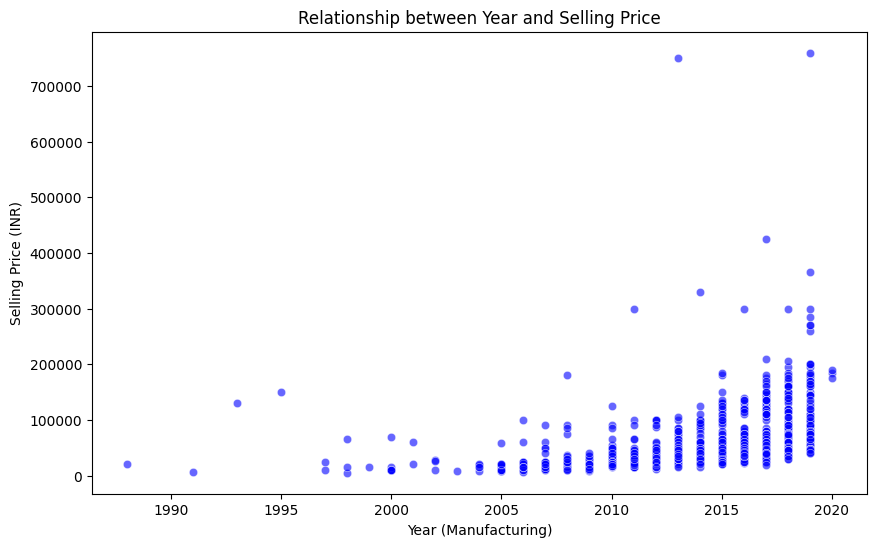

<ipython-input-12-c9aadce27d8d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='selling_price', data=data, palette='coolwarm')


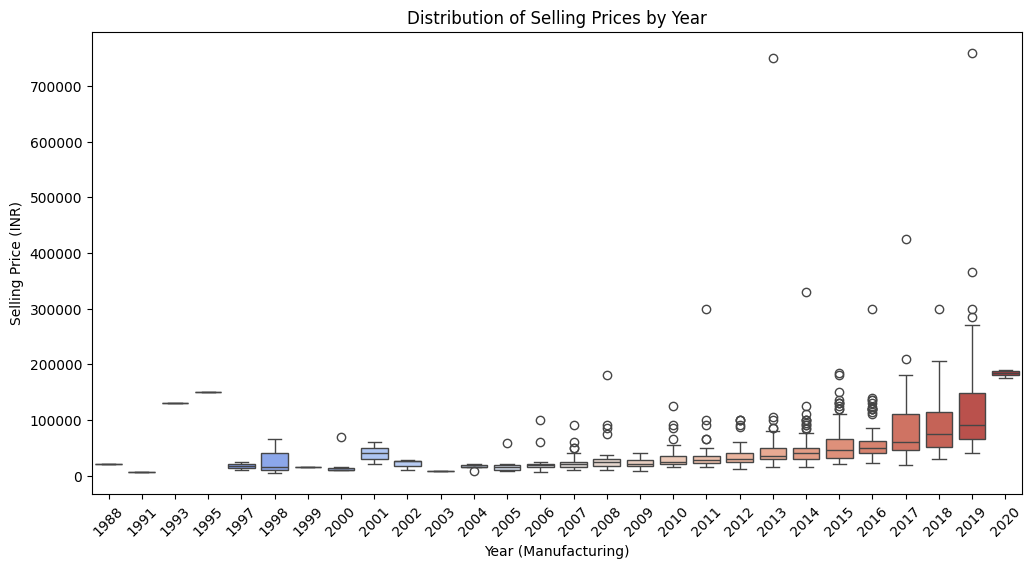

In [12]:

# Q-  Perform a bivariate analysis to visualize the relationship between year and selling_price.

# Visualize the relationship between year and selling_price
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='year', y='selling_price', data=data, color='blue', alpha=0.6)
    plt.title('Relationship between Year and Selling Price')
    plt.xlabel('Year (Manufacturing)')
    plt.ylabel('Selling Price (INR)')
    plt.show()

    # Box Plot to show distribution of selling prices by year
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='year', y='selling_price', data=data, palette='coolwarm')
    plt.title('Distribution of Selling Prices by Year')
    plt.xlabel('Year (Manufacturing)')
    plt.ylabel('Selling Price (INR)')
    plt.xticks(rotation=45)
    plt.show()

except KeyError:
    print("Error: 'year' or 'selling_price' column not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


In [13]:

# Q-13  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

# Calculate the average depreciation in selling price
from datetime import datetime

try:
    # Define the current year
    current_year = datetime.now().year  # Get the current year dynamically

    # Add a new column for bike age
    data['bike_age'] = current_year - data['year']

    # Calculate depreciation for each bike
    data['depreciation'] = data['ex_showroom_price'] - data['selling_price']

    # Calculate average depreciation per year of age
    avg_depreciation_per_year = data.groupby('bike_age')['depreciation'].mean()

    print("Average depreciation in selling price based on the bike's age:")
    print(avg_depreciation_per_year)

except KeyError:
    print("Error: One of the required columns ('year', 'ex_showroom_price', or 'selling_price') is not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Average depreciation in selling price based on the bike's age:
bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [14]:

# Q- Which bike names are priced significantly above the average price for their manufacturing year?

# Find bikes priced significantly above the average for their manufacturing year
try:
    # Calculate the average selling price for each manufacturing year
    year_avg_price = data.groupby('year')['selling_price'].mean()

    # Merge the average price back into the dataset
    data['avg_price_for_year'] = data['year'].map(year_avg_price)

    # Define a threshold for "significantly above average" (e.g., 20% above average)
    threshold = 1.2  # 20% higher than the average price for the year

    # Filter bikes priced significantly above the average
    significant_bikes = data[data['selling_price'] > (data['avg_price_for_year'] * threshold)]

    # Display the results
    print("Bikes priced significantly above the average price for their manufacturing year:")
    print(significant_bikes[['name', 'year', 'selling_price', 'avg_price_for_year']])

except KeyError:
    print("Error: One of the required columns ('year', 'selling_price') is not found in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Bikes priced significantly above the average price for their manufacturing year:
                                      name  year  selling_price  \
0                Royal Enfield Classic 350  2019         175000   
2      Royal Enfield Classic Gunmetal Grey  2018         150000   
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                           Yamaha YZF R3  2019         365000   
17                        Yamaha YZF R15 S  2010          40000   
...                                    ...   ...            ...   
984              Royal Enfield Classic 500  2014          95000   
985              Royal Enfield Classic 500  2011          90000   
1005                    TVS Apache RTR 160  2014          60000   
1008                    Bajaj Pulsar 220 F  2012          52000   
1023                Bajaj Avenger 220 dtsi  2012          45000   

      avg_price_for_year  
0          119689.511628  
2           87660.374046  
7           34289.285714  
13    

Correlation Matrix:
                    selling_price      year  km_driven  ex_showroom_price  \
selling_price            1.000000  0.402188  -0.212937           0.918583   
year                     0.402188  1.000000  -0.288675           0.126378   
km_driven               -0.212937 -0.288675   1.000000          -0.122011   
ex_showroom_price        0.918583  0.126378  -0.122011           1.000000   
bike_age                -0.402188 -1.000000   0.288675          -0.126378   
depreciation             0.345663 -0.343490   0.066531           0.688385   
avg_price_for_year       0.501140  0.802547  -0.309402           0.146598   

                    bike_age  depreciation  avg_price_for_year  
selling_price      -0.402188      0.345663            0.501140  
year               -1.000000     -0.343490            0.802547  
km_driven           0.288675      0.066531           -0.309402  
ex_showroom_price  -0.126378      0.688385            0.146598  
bike_age            1.000000      0.34

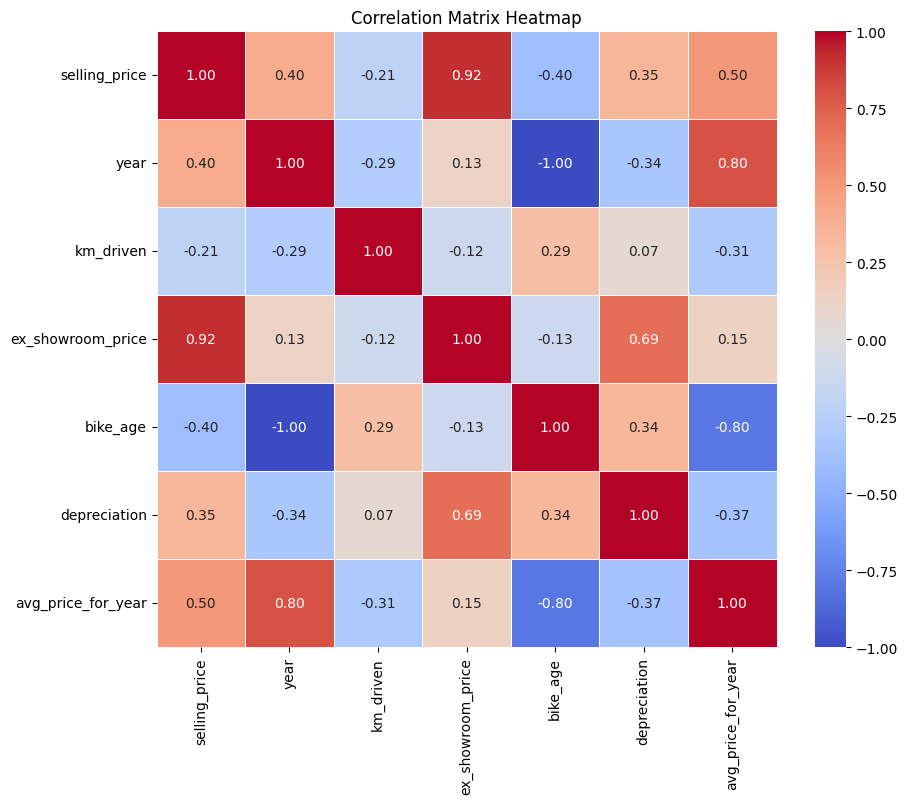

In [15]:

# Q 15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Select numeric columns from the dataset
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    numeric_data = data[numeric_columns]

    # Create the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")


Dataset Overview:
         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                      Engine Transmission       Color  Price ($)  Dealer_No   \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto     

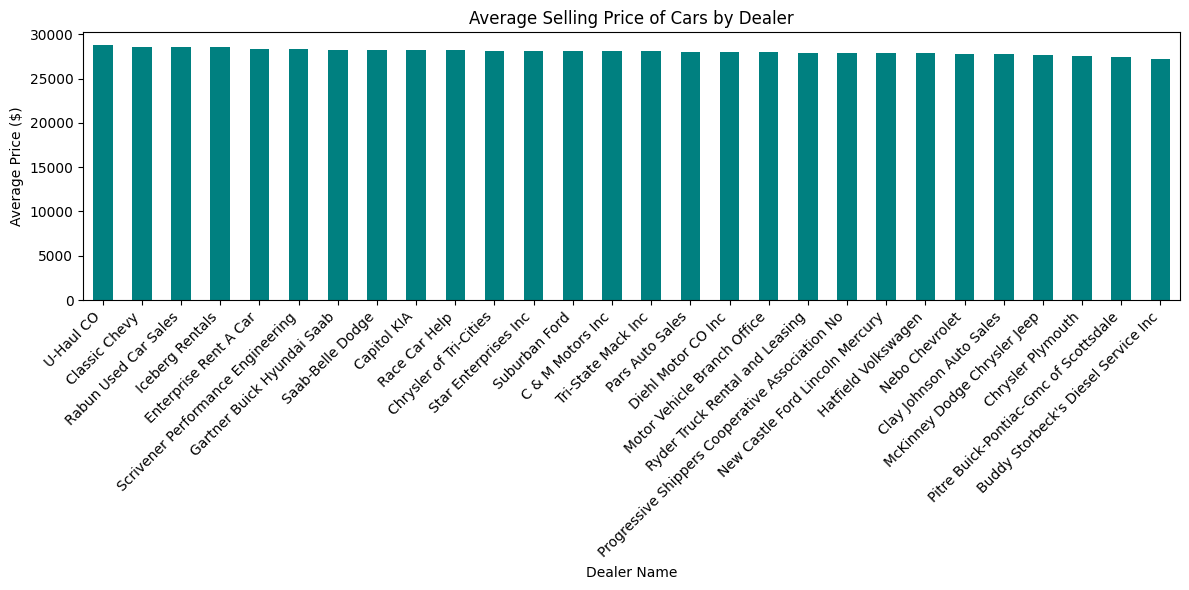

In [1]:

# EDA 2

# Q-1 What is the average selling price of cars for each dealer, and how does it compare across different dealers

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with the  file path
file_path = "/Car Sale.csv"  # path to your dataset
try:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Display the first few rows of the dataset
    print("Dataset Overview:")
    print(data.head())

    # Basic information about the dataset
    print("\nDataset Info:")
    print(data.info())

    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Basic statistics for numeric columns
    print("\nBasic Statistics:")
    print(data.describe())

    # Calculate the average selling price of cars for each dealer
    avg_price_by_dealer = data.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
    print("\nAverage Selling Price of Cars by Each Dealer:")
    print(avg_price_by_dealer)

    # Visualize the average selling price by dealer
    plt.figure(figsize=(12, 6))
    avg_price_by_dealer.plot(kind='bar', color='teal')
    plt.title('Average Selling Price of Cars by Dealer')
    plt.xlabel('Dealer Name')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except KeyError as e:
    print(f"Error: Missing column in the dataset - {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Price Variation (Standard Deviation) by Company:
Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

The company with the highest variation in prices is: Lincoln, with a standard deviation of 19658.05


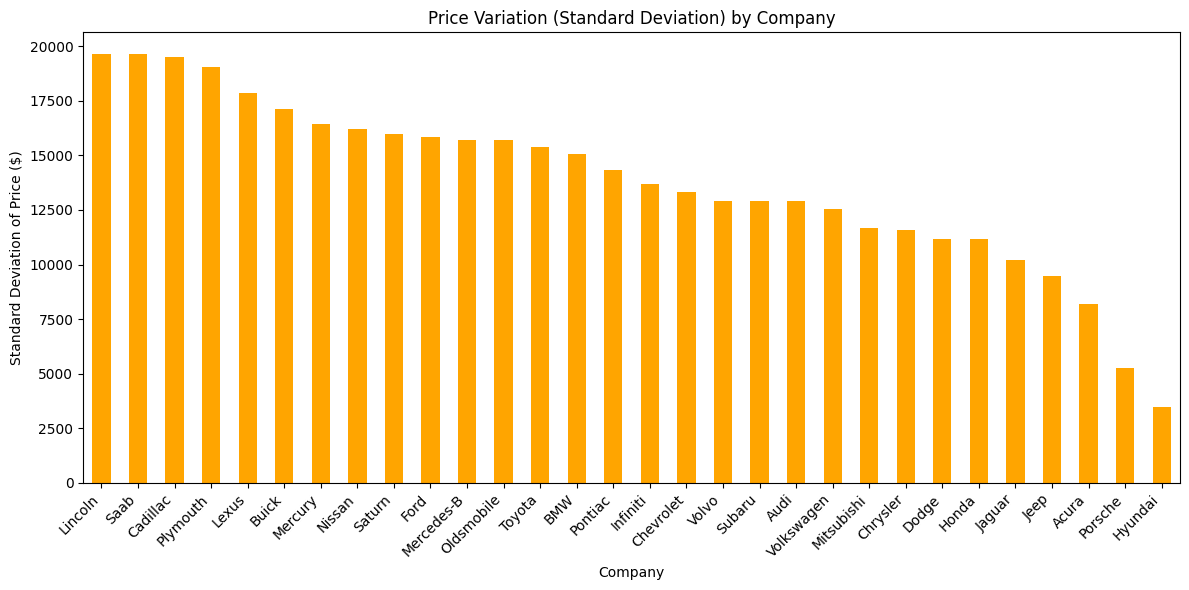

In [2]:

# Q-2  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

# Find the car brand with the highest variation in prices
try:
    # Group by Company and calculate the standard deviation of Price
    price_variation = data.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

    # Get the company with the highest price variation
    highest_variation_company = price_variation.idxmax()
    highest_variation_value = price_variation.max()

    print("Price Variation (Standard Deviation) by Company:")
    print(price_variation)
    print(f"\nThe company with the highest variation in prices is: {highest_variation_company}, with a standard deviation of {highest_variation_value:.2f}")

    # Visualize the price variation
    plt.figure(figsize=(12, 6))
    price_variation.plot(kind='bar', color='orange')
    plt.title('Price Variation (Standard Deviation) by Company')
    plt.xlabel('Company')
    plt.ylabel('Standard Deviation of Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: Missing column in the dataset - {e}")
except Exception as e:
    print(f"An error occurred: {e}")


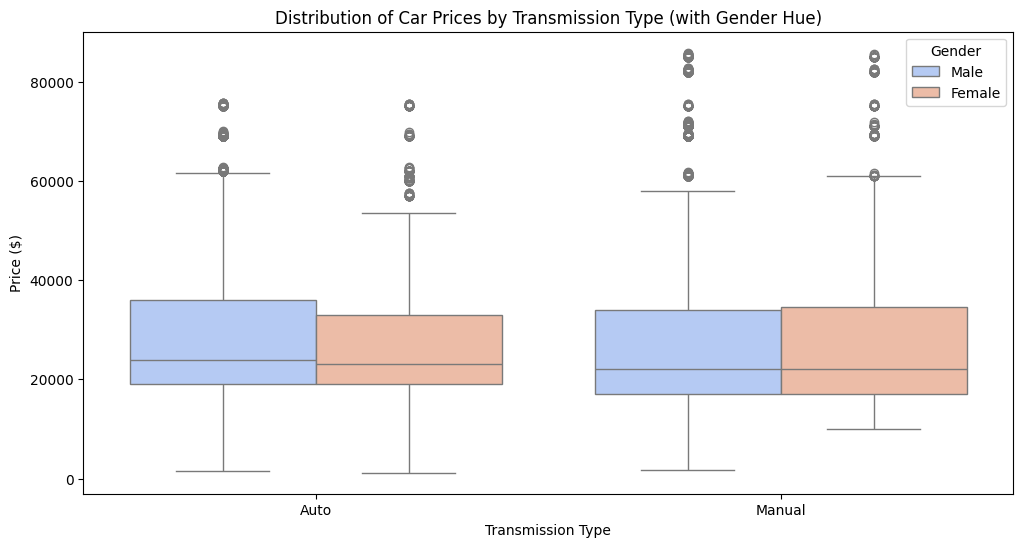

Interquartile Ranges (IQR) for Car Prices by Transmission Type and Gender:
Auto - Male - Q1: 19000.0, Q3: 36000.0, IQR: 17000.0
Auto - Female - Q1: 19000.0, Q3: 33001.0, IQR: 14001.0
Manual - Male - Q1: 17000.0, Q3: 34000.0, IQR: 17000.0
Manual - Female - Q1: 17000.0, Q3: 34600.0, IQR: 17600.0


In [4]:

# Q- What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

# Analyze distribution of car prices for each transmission type with hue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Transmission' not in data.columns or 'Price ($)' not in data.columns or 'Gender' not in data.columns:
        raise KeyError("Missing required columns ('Transmission', 'Price ($)', or 'Gender').")

    # Visualize the distribution of car prices for each transmission type with Gender as hue
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Transmission', y='Price ($)', hue='Gender', data=data, palette='coolwarm')
    plt.title('Distribution of Car Prices by Transmission Type (with Gender Hue)')
    plt.xlabel('Transmission Type')
    plt.ylabel('Price ($)')
    plt.legend(title='Gender')
    plt.show()

    # Calculate IQRs for each transmission type and gender
    iqr_comparison = {}
    for transmission in data['Transmission'].unique():
        for gender in data['Gender'].unique():
            subset = data[(data['Transmission'] == transmission) & (data['Gender'] == gender)]['Price ($)']
            Q1 = subset.quantile(0.25)  # First quartile (25th percentile)
            Q3 = subset.quantile(0.75)  # Third quartile (75th percentile)
            IQR = Q3 - Q1
            iqr_comparison[f"{transmission} - {gender}"] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR}

    # Display the IQR comparison
    print("Interquartile Ranges (IQR) for Car Prices by Transmission Type and Gender:")
    for key, values in iqr_comparison.items():
        print(f"{key} - Q1: {values['Q1']}, Q3: {values['Q3']}, IQR: {values['IQR']}")

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



<ipython-input-5-58284358b460>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Dealer_Region', y='Price ($)', data=data, palette='viridis')


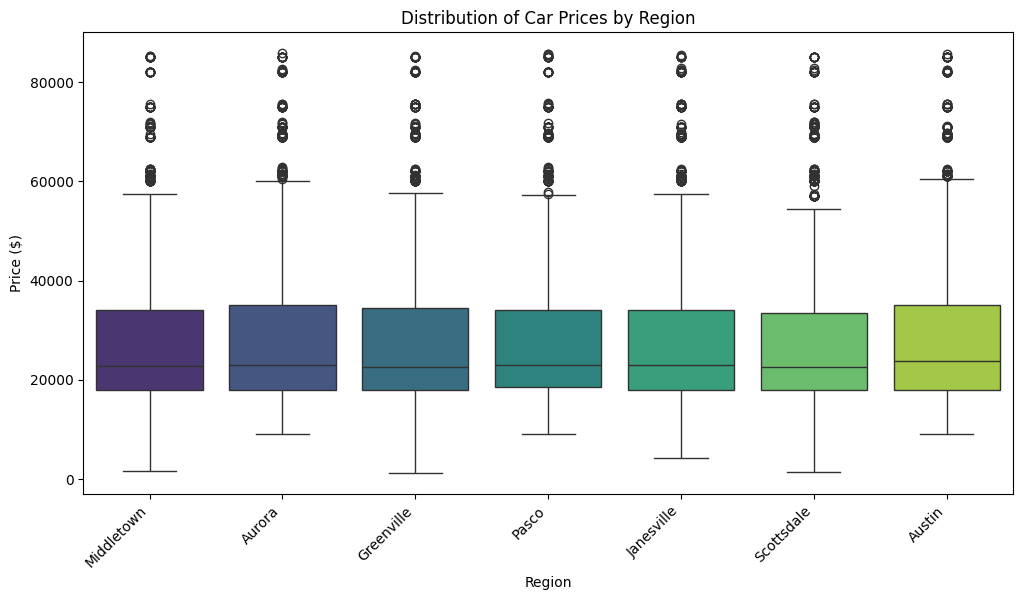


Summary Statistics of Car Prices by Region:
                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco

In [5]:

# Q-  What is the distribution of car prices across different regions?

# Analyze distribution of car prices across different regions
try:
    # Check if required columns exist in the dataset
    if 'Dealer_Region' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Dealer_Region' or 'Price ($)').")

    # Visualize the distribution using box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dealer_Region', y='Price ($)', data=data, palette='viridis')
    plt.title('Distribution of Car Prices by Region')
    plt.xlabel('Region')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    # Calculate summary statistics for each region
    region_price_stats = data.groupby('Dealer_Region')['Price ($)'].describe()
    print("\nSummary Statistics of Car Prices by Region:")
    print(region_price_stats)

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Distribution of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


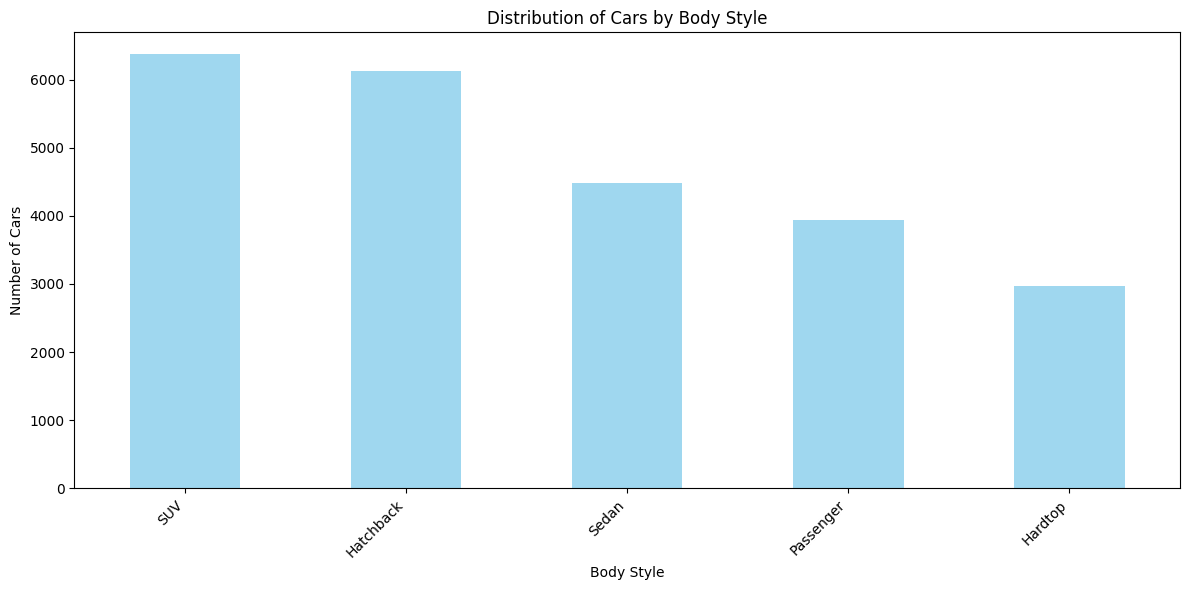

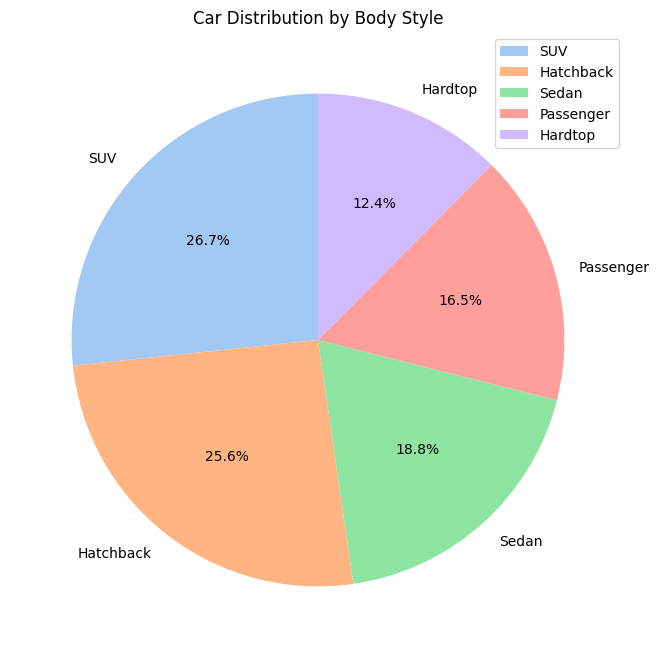

In [6]:

# Q-5 What is the distribution of cars based on body styles?

# Analyze the distribution of cars based on body styles
try:
    # Check if the 'Body Style' column exists in the dataset
    if 'Body Style' not in data.columns:
        raise KeyError("'Body Style' column not found in the dataset.")

    # Calculate the distribution of cars by body style
    body_style_counts = data['Body Style'].value_counts()
    print("Distribution of Cars by Body Style:")
    print(body_style_counts)

    # Visualize the distribution using a bar chart
    plt.figure(figsize=(12, 6))
    body_style_counts.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title('Distribution of Cars by Body Style')
    plt.xlabel('Body Style')
    plt.ylabel('Number of Cars')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Visualize the distribution using a pie chart
    plt.figure(figsize=(8, 8))
    body_style_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), legend=True)
    plt.title('Car Distribution by Body Style')
    plt.ylabel('')  # Remove the default ylabel
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


<ipython-input-7-398462a6c3a4>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = data.groupby(['Gender', 'Income Category'])['Price ($)'].mean().unstack()


Average Selling Price of Cars by Gender and Annual Income:
Income Category          <30k  30k-60k  60k-90k  90k-120k         >120k
Gender                                                                 
Female           28132.038732      NaN      NaN   46001.0  28314.347520
Male             27816.302247      NaN  43000.0       NaN  28101.413494


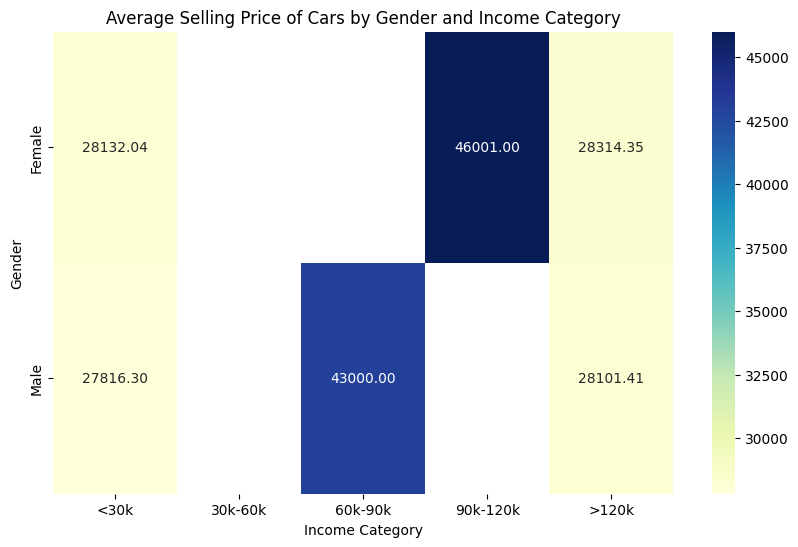

In [7]:

# Q-6  How does the average selling price of cars vary by customer gender and annual income?

# Analyze the variation in average selling price by customer gender and annual income
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Gender' not in data.columns or 'Annual Income' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Gender', 'Annual Income', or 'Price ($)').")

    # Create income bins for categorization
    income_bins = [0, 30000, 60000, 90000, 120000, float('inf')]
    income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k']
    data['Income Category'] = pd.cut(data['Annual Income'], bins=income_bins, labels=income_labels)

    # Calculate the average selling price by Gender and Income Category
    avg_price_by_gender_income = data.groupby(['Gender', 'Income Category'])['Price ($)'].mean().unstack()
    print("Average Selling Price of Cars by Gender and Annual Income:")
    print(avg_price_by_gender_income)

    # Visualize the variation using a heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(avg_price_by_gender_income, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title('Average Selling Price of Cars by Gender and Income Category')
    plt.xlabel('Income Category')
    plt.ylabel('Gender')
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


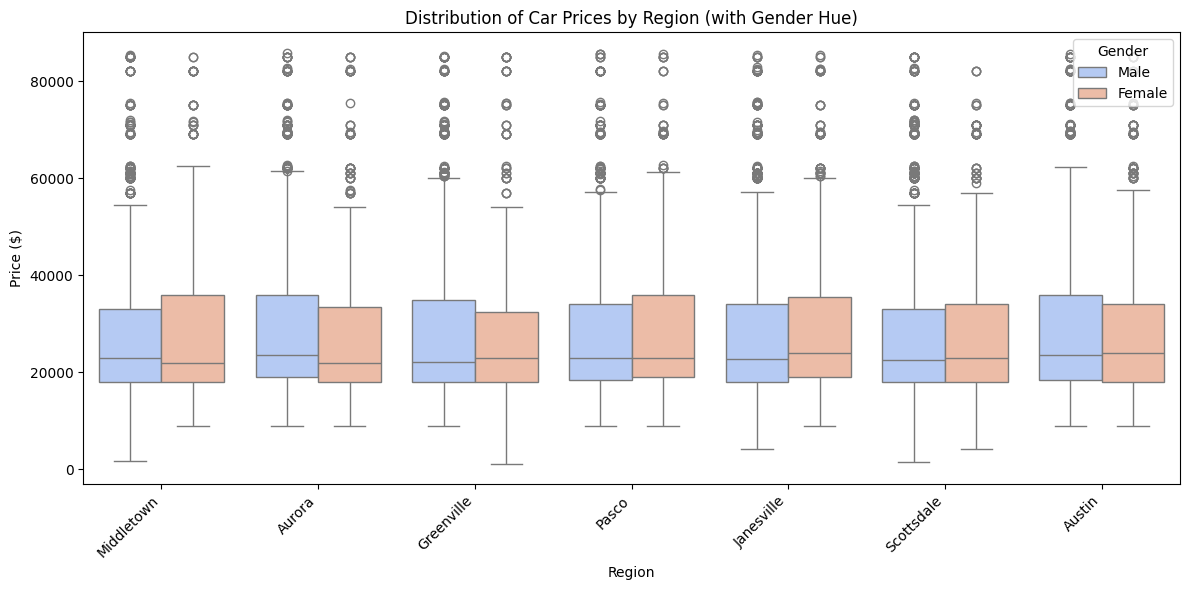

Number of Cars Sold by Region and Gender:
Gender         Female  Male
Dealer_Region              
Aurora            656  2474
Austin            910  3225
Greenville        661  2467
Janesville        805  3016
Middletown        710  2418
Pasco             636  2495
Scottsdale        730  2703


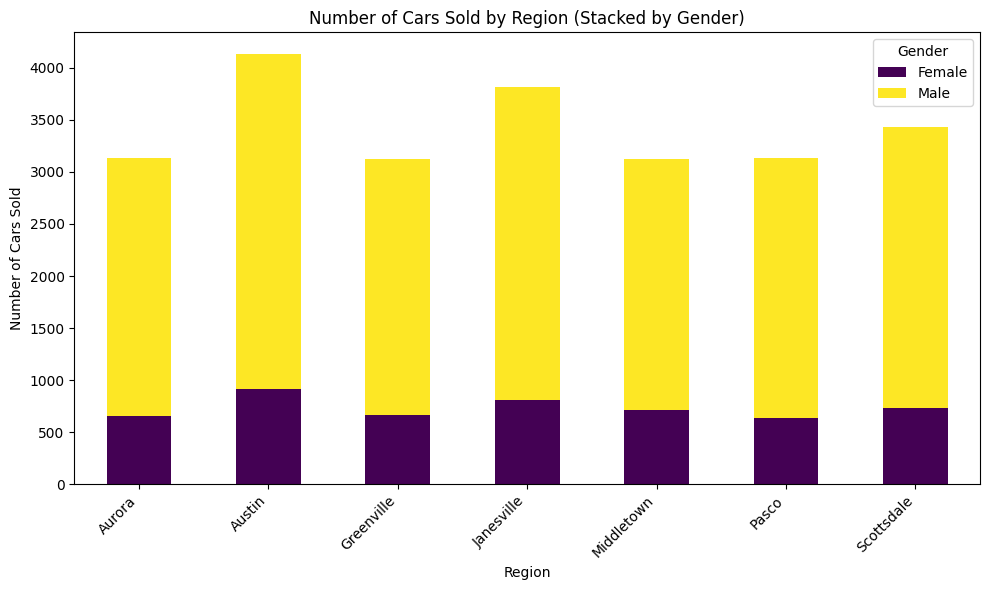

In [9]:

# Q-7  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

# Analyze car prices and sales distribution by region with hue
try:
    # Check if required columns exist in the dataset
    if 'Dealer_Region' not in data.columns or 'Price ($)' not in data.columns or 'Gender' not in data.columns:
        raise KeyError("Missing required columns ('Dealer_Region', 'Price ($)', or 'Gender').")

    # Distribution of car prices by region using box plots with Gender as hue
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Dealer_Region', y='Price ($)', hue='Gender', data=data, palette='coolwarm')
    plt.title('Distribution of Car Prices by Region (with Gender Hue)')
    plt.xlabel('Region')
    plt.ylabel('Price ($)')
    plt.legend(title='Gender', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Count the number of cars sold by region and gender
    cars_sold_by_region_gender = data.groupby(['Dealer_Region', 'Gender']).size().unstack()
    print("Number of Cars Sold by Region and Gender:")
    print(cars_sold_by_region_gender)

    # Visualize the number of cars sold by region and gender using a stacked bar chart
    cars_sold_by_region_gender.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title('Number of Cars Sold by Region (Stacked by Gender)')
    plt.xlabel('Region')
    plt.ylabel('Number of Cars Sold')
    plt.legend(title='Gender')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



Average Car Price by Engine Size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


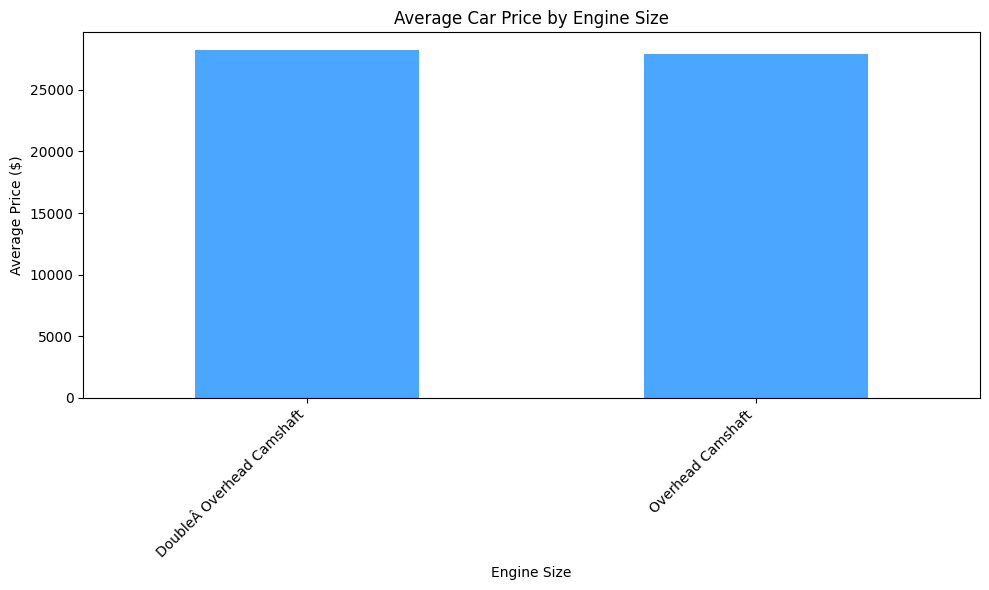

In [10]:

# Q- How does the average car price differ between cars with different engine sizes?

# Analyze average car prices by engine size
try:
    # Check if required columns exist in the dataset
    if 'Engine' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Engine' or 'Price ($)').")

    # Calculate the average car price for each engine size
    avg_price_by_engine = data.groupby('Engine')['Price ($)'].mean().sort_values(ascending=False)
    print("Average Car Price by Engine Size:")
    print(avg_price_by_engine)

    # Visualize the variation using a bar chart
    plt.figure(figsize=(10, 6))
    avg_price_by_engine.plot(kind='bar', color='dodgerblue', alpha=0.8)
    plt.title('Average Car Price by Engine Size')
    plt.xlabel('Engine Size')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


<ipython-input-12-495b62b34ac4>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = data.groupby('Income Bracket')['Price ($)'].mean()


Average Car Prices by Income Bracket:
Income Bracket
<30k        27884.297820
30k-60k              NaN
60k-90k     43000.000000
90k-120k    46001.000000
>120k       28146.802995
Name: Price ($), dtype: float64


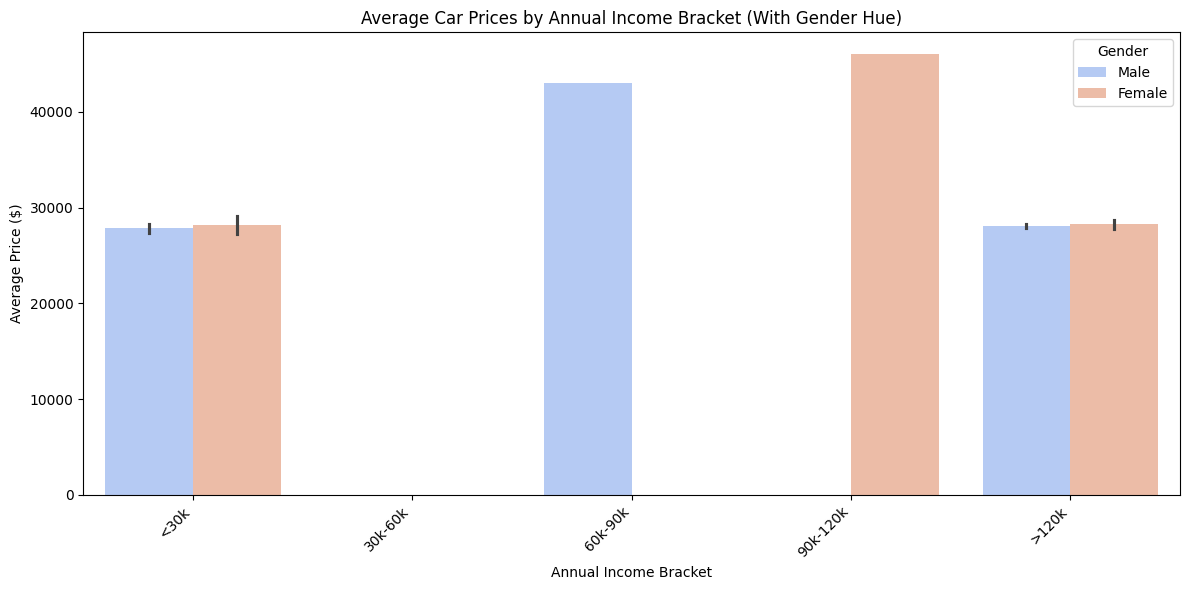

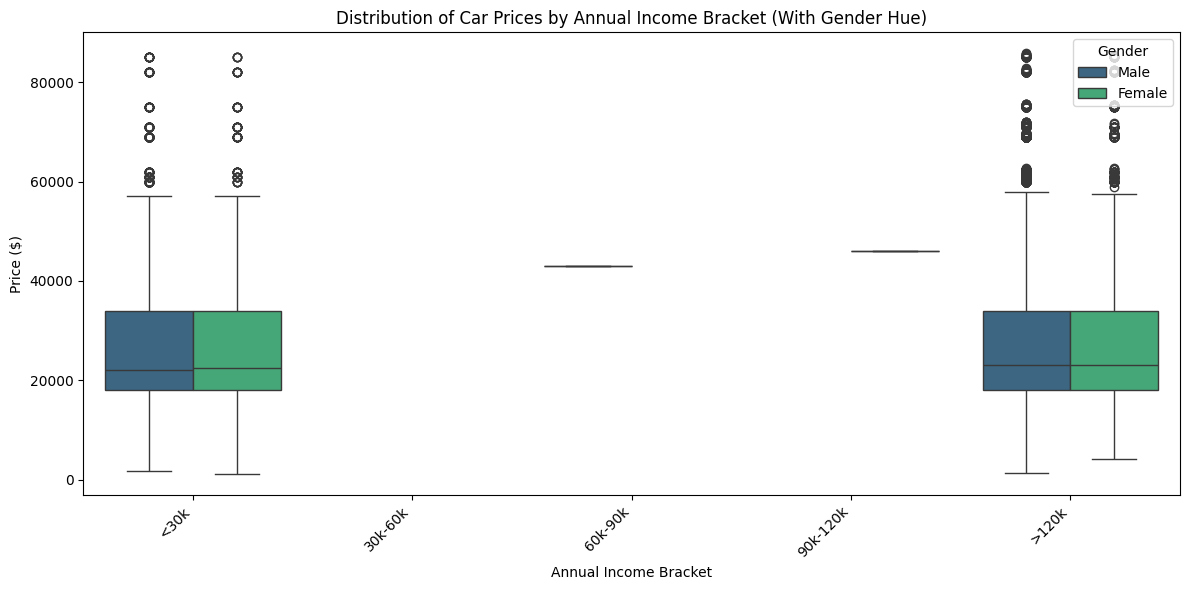

In [12]:

# Q-9 How do car prices vary based on the customer’s annual income bracket?

# Analyze car prices based on annual income bracket with hue
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Annual Income' not in data.columns or 'Price ($)' not in data.columns or 'Gender' not in data.columns:
        raise KeyError("Missing required columns ('Annual Income', 'Price ($)', or 'Gender').")

    # Define income brackets
    income_bins = [0, 30000, 60000, 90000, 120000, float('inf')]
    income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '>120k']
    data['Income Bracket'] = pd.cut(data['Annual Income'], bins=income_bins, labels=income_labels)

    # Calculate average car price for each income bracket
    avg_price_by_income = data.groupby('Income Bracket')['Price ($)'].mean()
    print("Average Car Prices by Income Bracket:")
    print(avg_price_by_income)

    # Visualize average prices using a bar chart with hue
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Income Bracket', y='Price ($)', hue='Gender', data=data, palette='coolwarm')
    plt.title('Average Car Prices by Annual Income Bracket (With Gender Hue)')
    plt.xlabel('Annual Income Bracket')
    plt.ylabel('Average Price ($)')
    plt.legend(title='Gender', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualize distribution using box plots with hue
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Income Bracket', y='Price ($)', hue='Gender', data=data, palette='viridis')
    plt.title('Distribution of Car Prices by Annual Income Bracket (With Gender Hue)')
    plt.xlabel('Annual Income Bracket')
    plt.ylabel('Price ($)')
    plt.legend(title='Gender', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")




Top 5 Car Models with the Highest Sales:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


<ipython-input-13-7f45d19b4ebb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Price ($)', data=top_models_data, palette='viridis')


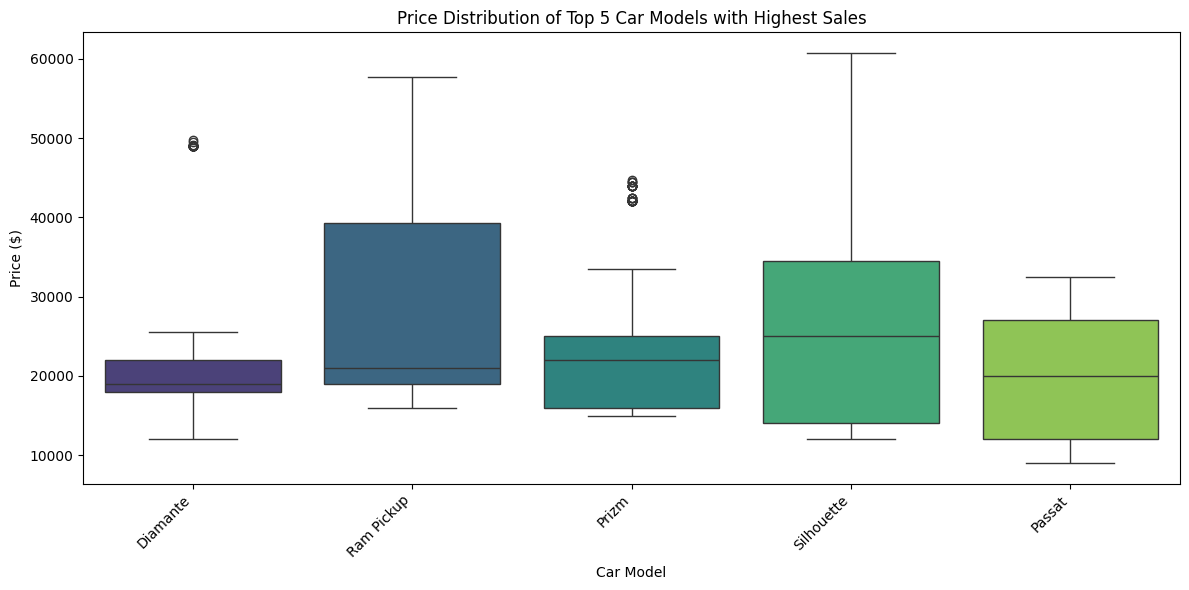

<ipython-input-13-7f45d19b4ebb>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='Price ($)', data=top_models_data, palette='coolwarm')


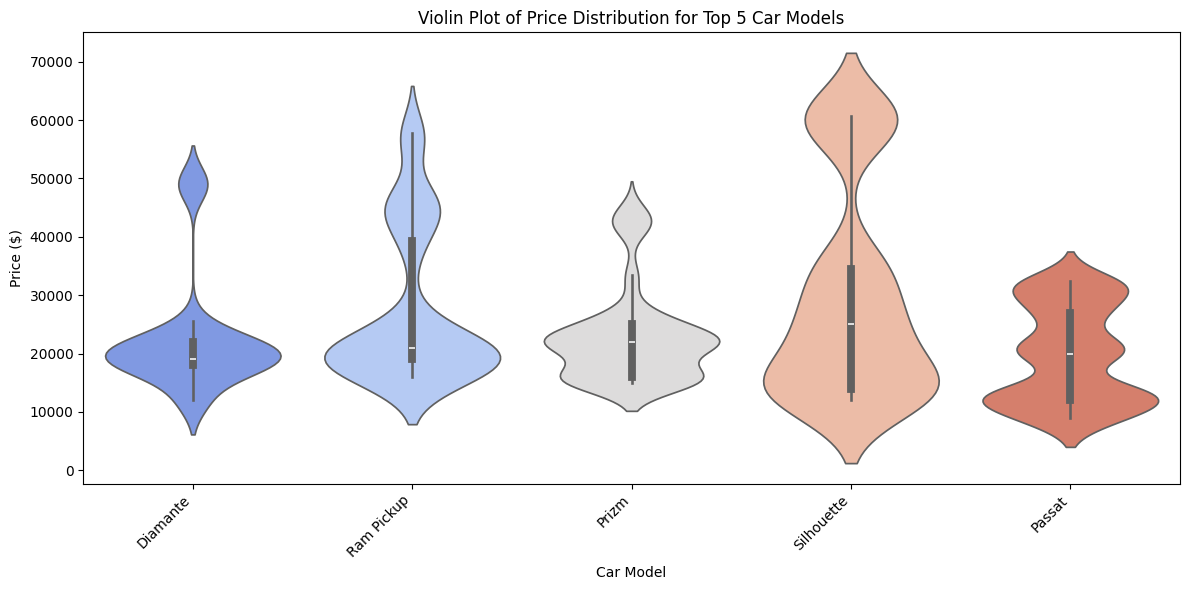

In [13]:

# Q-10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Analyze top 5 car models with the highest sales and their price distribution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Model' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Model' or 'Price ($)').")

    # Count the number of sales for each model
    model_sales_count = data['Model'].value_counts().head(5)
    print("Top 5 Car Models with the Highest Sales:")
    print(model_sales_count)

    # Filter the dataset for only the top 5 models
    top_models = model_sales_count.index
    top_models_data = data[data['Model'].isin(top_models)]

    # Visualize the price distribution for the top 5 models using box plots
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Model', y='Price ($)', data=top_models_data, palette='viridis')
    plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
    plt.xlabel('Car Model')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Visualize the price distribution using violin plots
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Model', y='Price ($)', data=top_models_data, palette='coolwarm')
    plt.title('Violin Plot of Price Distribution for Top 5 Car Models')
    plt.xlabel('Car Model')
    plt.ylabel('Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Average Car Prices by Engine and Color:
Color                             Black    Pale White           Red
Engine                                                             
DoubleÂ Overhead Camshaft  25766.451103  30347.987460  27434.392314
Overhead Camshaft          31732.967164  24327.767694  30153.405229


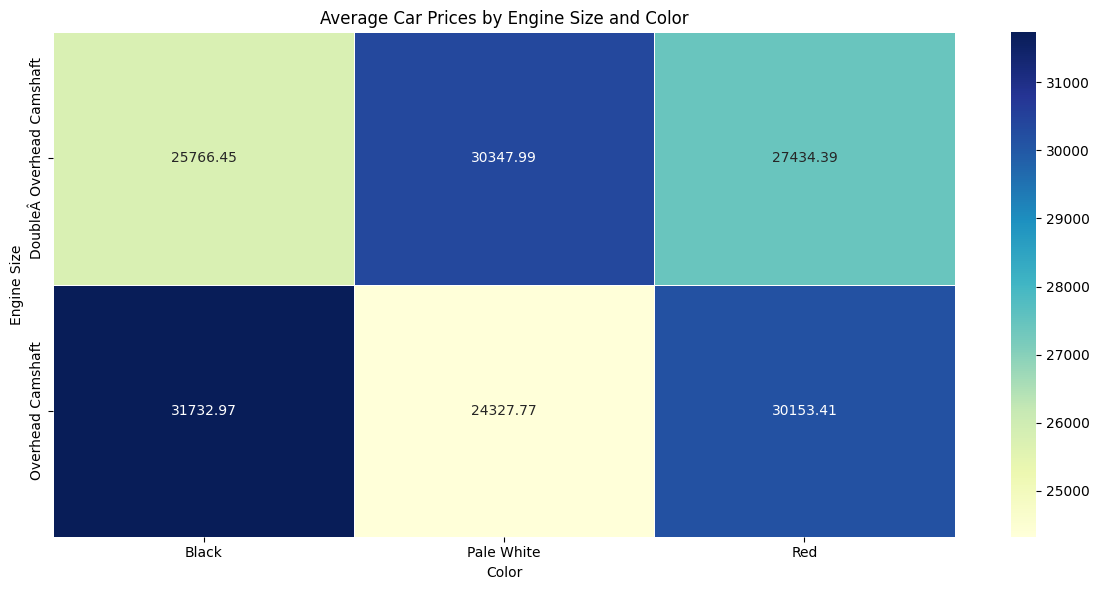


Price Variation (Standard Deviation) by Car Color:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


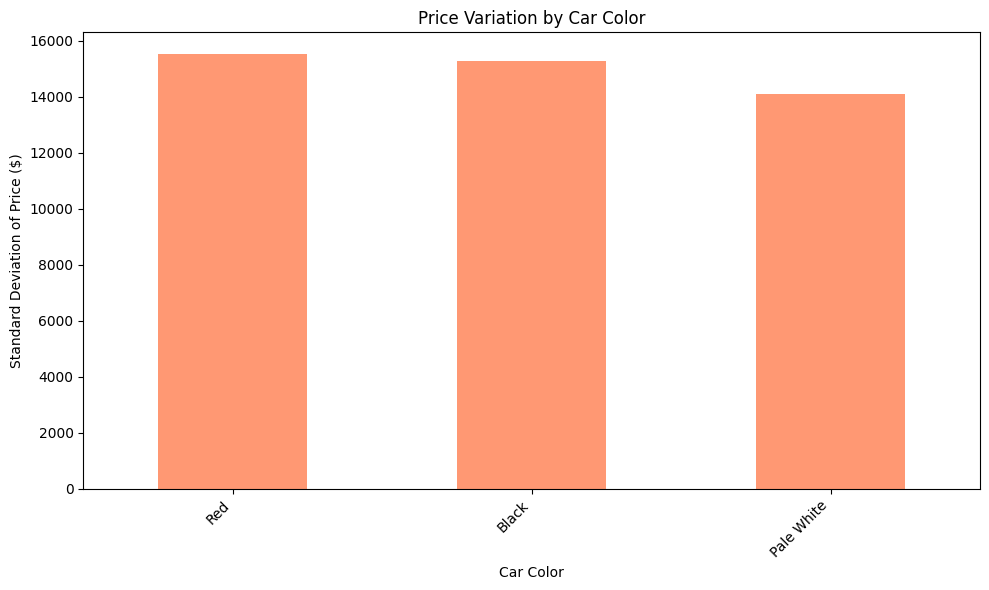

In [15]:

# Q-11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Analyze car prices with engine size and car color, and identify colors with the highest price variation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Engine' not in data.columns or 'Color' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Engine', 'Color', or 'Price ($)').")

    # Calculate average car price grouped by Engine and Color
    avg_price_by_engine_color = data.groupby(['Engine', 'Color'])['Price ($)'].mean().unstack()
    print("Average Car Prices by Engine and Color:")
    print(avg_price_by_engine_color)

    # Visualize the average prices using a heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(avg_price_by_engine_color, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
    plt.title('Average Car Prices by Engine Size and Color')
    plt.xlabel('Color')
    plt.ylabel('Engine Size')
    plt.tight_layout()
    plt.show()

    # Identify colors with the highest price variation (standard deviation)
    price_variation_by_color = data.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
    print("\nPrice Variation (Standard Deviation) by Car Color:")
    print(price_variation_by_color)

    # Visualize the price variation by color using a bar chart
    plt.figure(figsize=(10, 6))
    price_variation_by_color.plot(kind='bar', color='coral', alpha=0.8)
    plt.title('Price Variation by Car Color')
    plt.xlabel('Car Color')
    plt.ylabel('Standard Deviation of Price ($)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Monthly Sales Distribution:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


<ipython-input-16-ce77b58c5913>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')


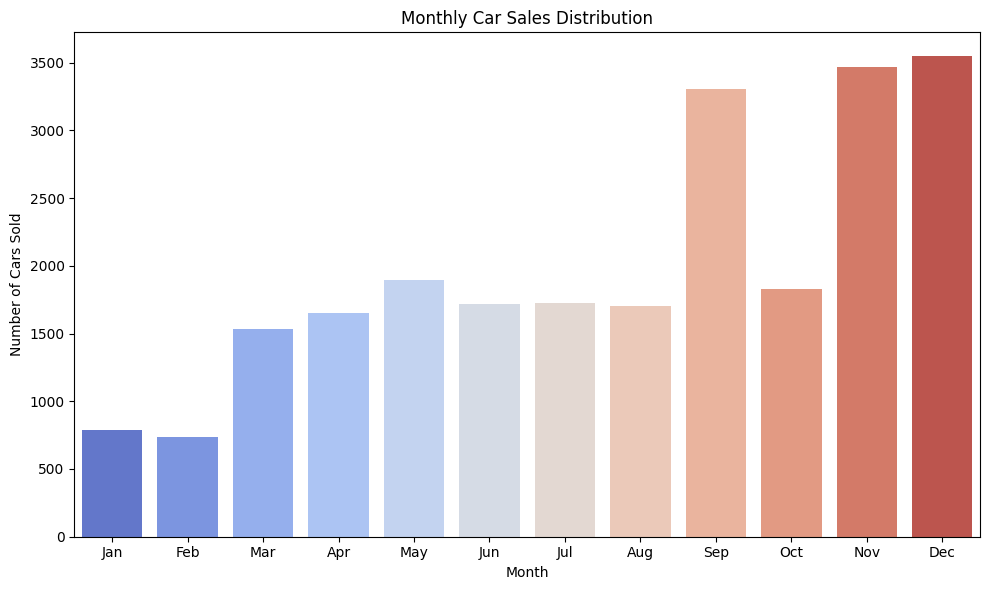


Seasonal Sales Distribution:
Season
Fall      8605
Summer    5145
Spring    5085
Winter    5071
Name: count, dtype: int64


<ipython-input-16-ce77b58c5913>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette='viridis')


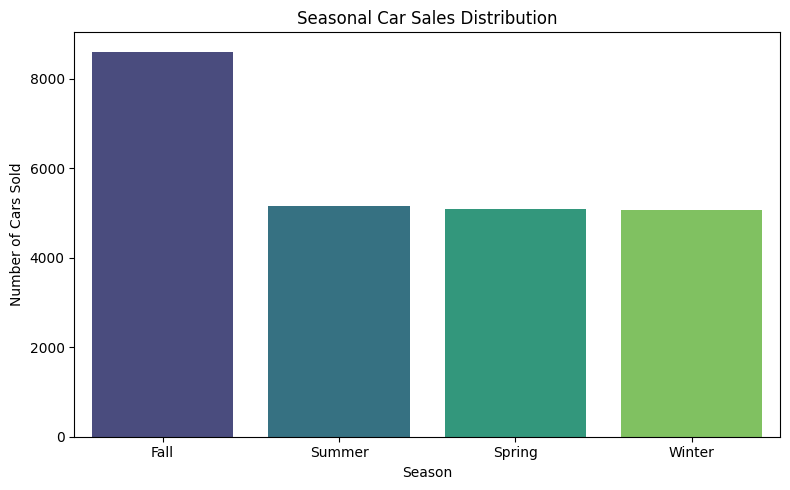

In [16]:

# Q-12 Is there any seasonal trend in car sales based on the date of sale?

# Analyze seasonal trends in car sales based on date of sale
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if the 'Date' column exists in the dataset
    if 'Date' not in data.columns:
        raise KeyError("'Date' column not found in the dataset.")

    # Convert the 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])

    # Extract month and year from the date
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year

    # Group by month to analyze sales trends
    monthly_sales = data['Month'].value_counts().sort_index()
    print("Monthly Sales Distribution:")
    print(monthly_sales)

    # Visualize the monthly sales trends
    plt.figure(figsize=(10, 6))
    sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
    plt.title('Monthly Car Sales Distribution')
    plt.xlabel('Month')
    plt.ylabel('Number of Cars Sold')
    plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.show()

    # Analyze sales trends by season
    # Define seasons: Winter (Dec-Feb), Spring (Mar-May), Summer (Jun-Aug), Fall (Sep-Nov)
    def assign_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        elif month in [9, 10, 11]:
            return 'Fall'

    data['Season'] = data['Month'].apply(assign_season)
    seasonal_sales = data['Season'].value_counts()
    print("\nSeasonal Sales Distribution:")
    print(seasonal_sales)

    # Visualize the seasonal sales trends
    plt.figure(figsize=(8, 5))
    sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette='viridis')
    plt.title('Seasonal Car Sales Distribution')
    plt.xlabel('Season')
    plt.ylabel('Number of Cars Sold')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


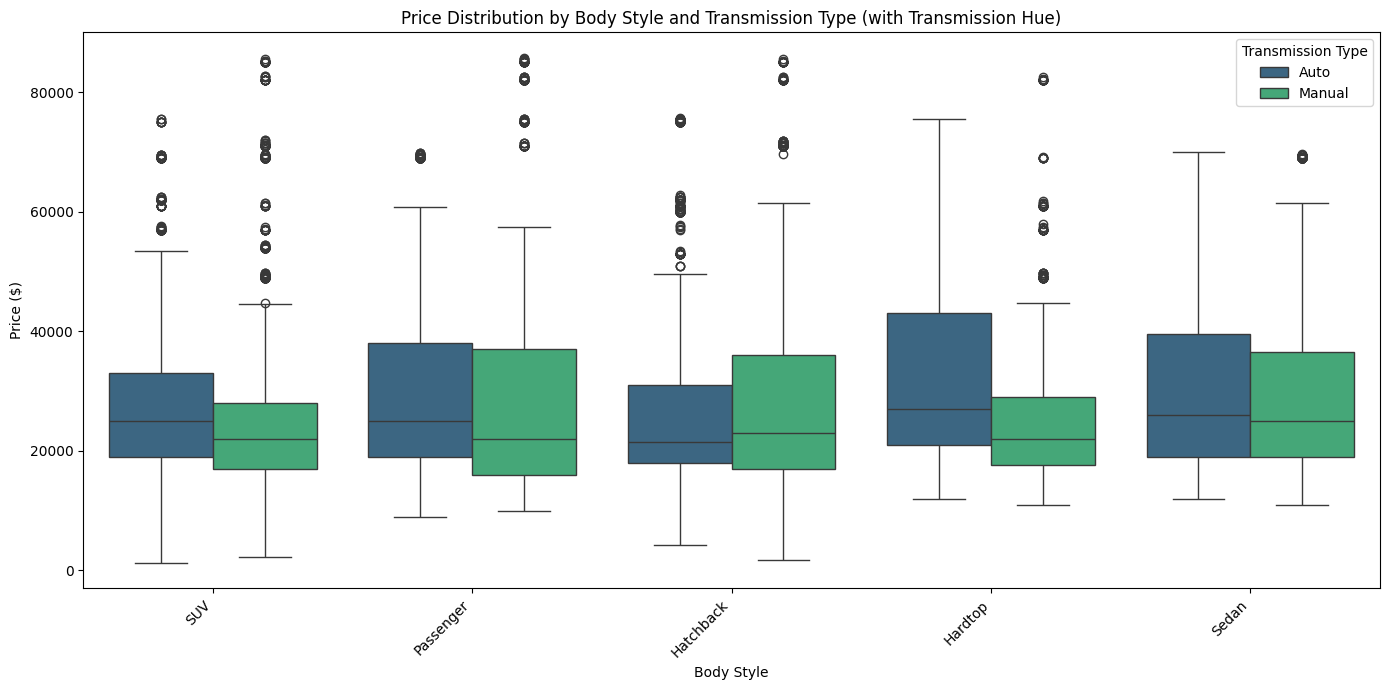

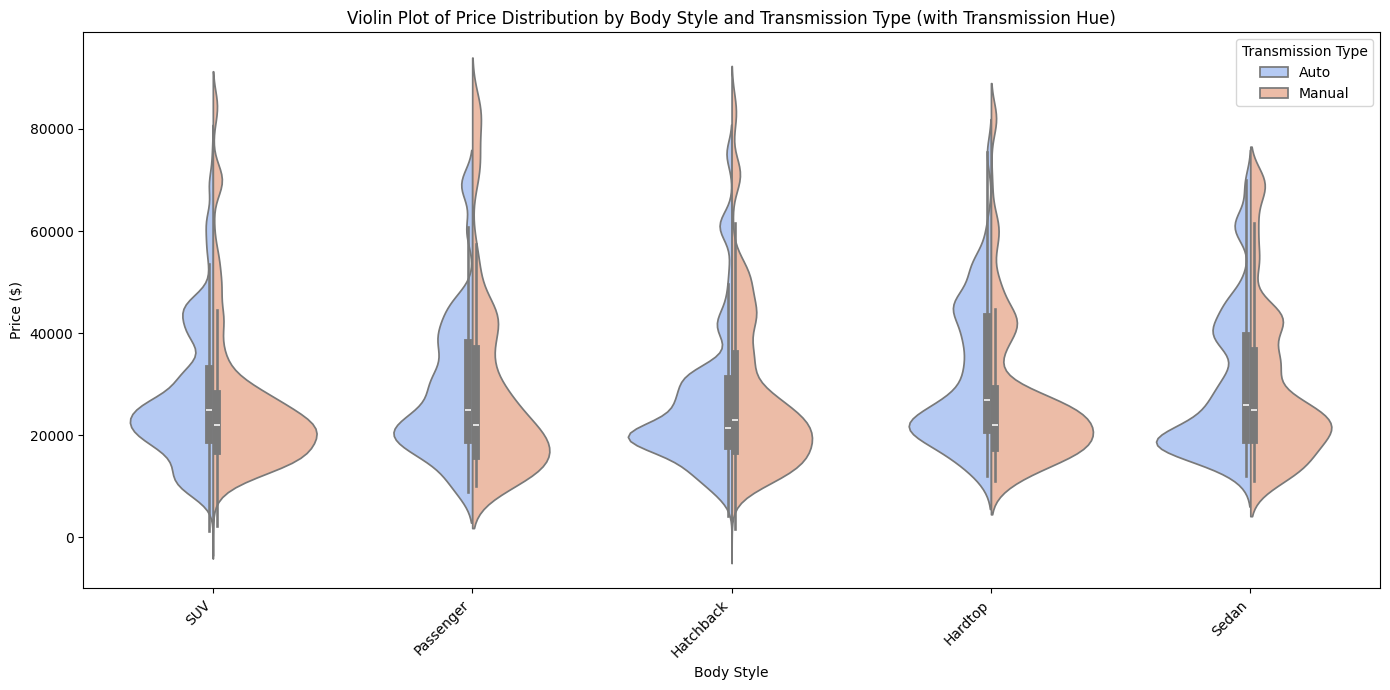

Price Statistics for Each Combination of Body Style and Transmission:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.

In [17]:

# Q- 13 How does the car price distribution change when considering different combinations of body style and transmission type?

# Analyze car price distribution based on combinations of body style and transmission type
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Body Style' not in data.columns or 'Transmission' not in data.columns or 'Price ($)' not in data.columns or 'Gender' not in data.columns:
        raise KeyError("Missing required columns ('Body Style', 'Transmission', 'Price ($)', or 'Gender').")

    # Visualize price distribution using box plots
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=data, palette='viridis')
    plt.title('Price Distribution by Body Style and Transmission Type (with Transmission Hue)')
    plt.xlabel('Body Style')
    plt.ylabel('Price ($)')
    plt.legend(title='Transmission Type', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualize price distribution using violin plots
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Body Style', y='Price ($)', hue='Transmission', data=data, split=True, palette='coolwarm')
    plt.title('Violin Plot of Price Distribution by Body Style and Transmission Type (with Transmission Hue)')
    plt.xlabel('Body Style')
    plt.ylabel('Price ($)')
    plt.legend(title='Transmission Type', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Calculate price statistics for each combination
    price_stats = data.groupby(['Body Style', 'Transmission'])['Price ($)'].describe()
    print("Price Statistics for Each Combination of Body Style and Transmission:")
    print(price_stats)

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Correlation Matrix:
                Price ($)  Engine Numeric  Annual Income
Price ($)        1.000000             NaN       0.012065
Engine Numeric        NaN             NaN            NaN
Annual Income    0.012065             NaN       1.000000


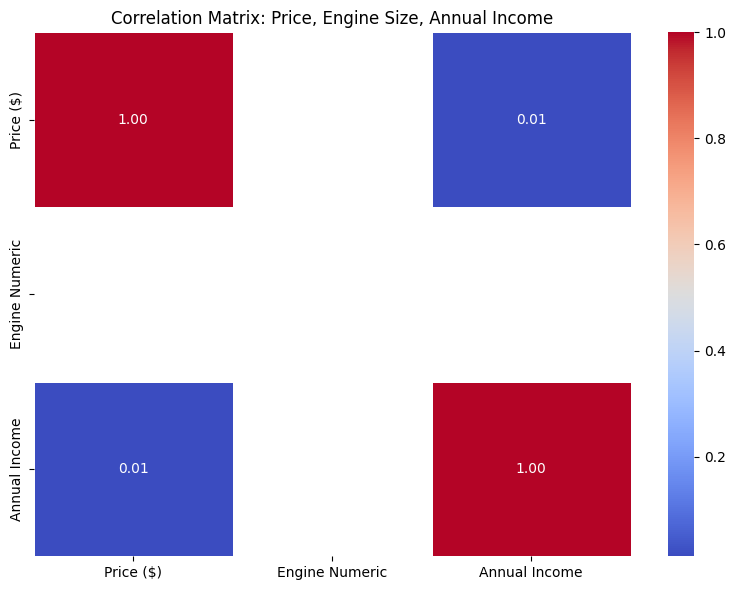

<ipython-input-18-aaf946d49c8a>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')


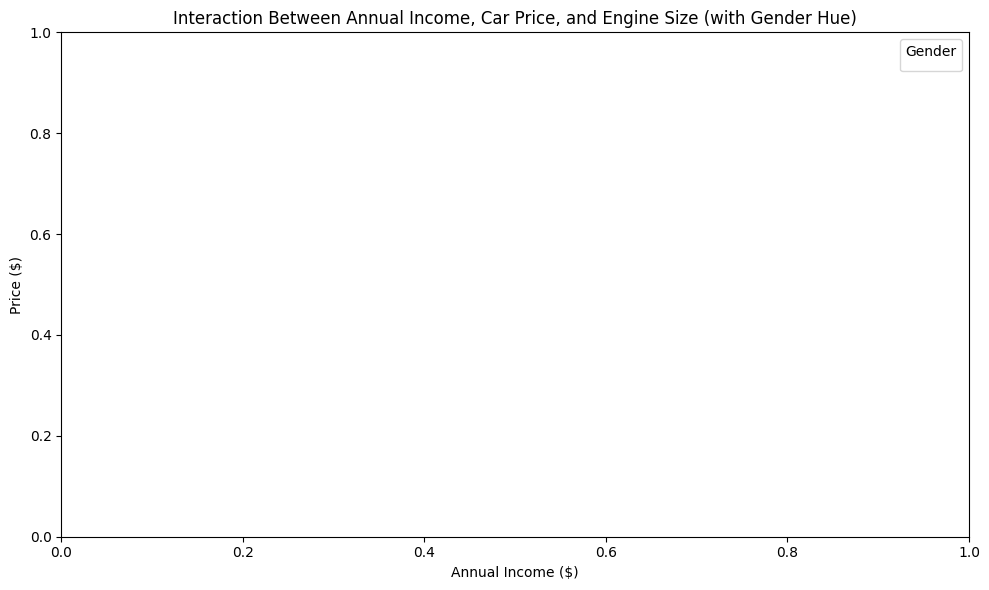

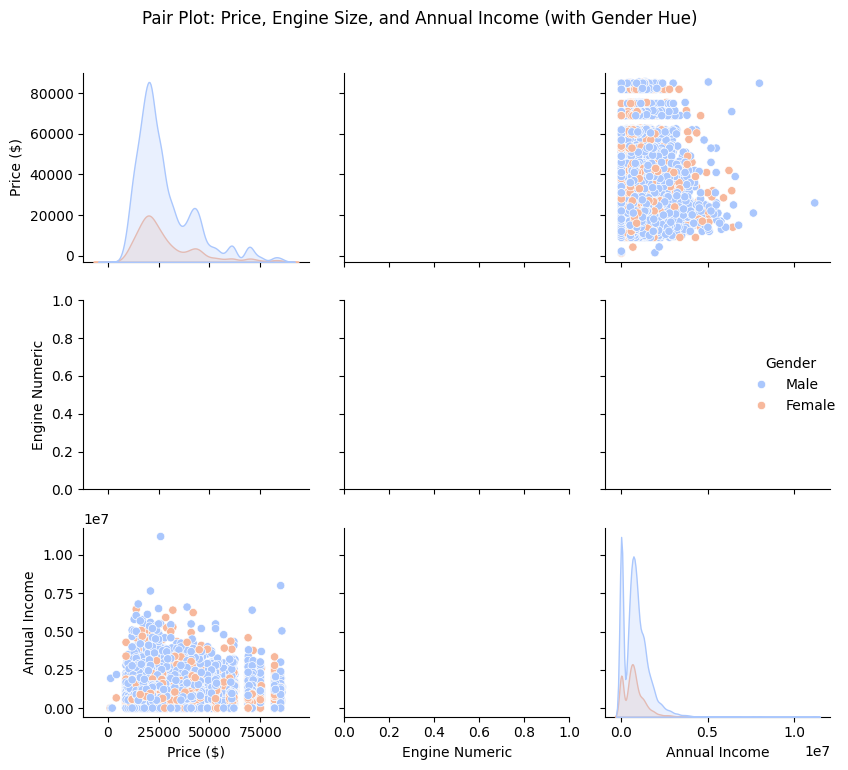

In [18]:

# Q-14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

# Analyze correlation between car price, engine size, and annual income
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Price ($)' not in data.columns or 'Engine' not in data.columns or 'Annual Income' not in data.columns or 'Gender' not in data.columns:
        raise KeyError("Missing required columns ('Price ($)', 'Engine', 'Annual Income', or 'Gender').")

    # Convert engine size to a numeric feature (if it's categorical, extract numeric values)
    # Example: 'V6', 'I4' to integer values like 6, 4 (adjust based on your dataset)
    data['Engine Numeric'] = data['Engine'].str.extract('(\d+)').astype(float)

    # Correlation matrix
    correlation_features = data[['Price ($)', 'Engine Numeric', 'Annual Income']].corr()
    print("Correlation Matrix:")
    print(correlation_features)

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_features, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix: Price, Engine Size, Annual Income')
    plt.tight_layout()
    plt.show()

    # Scatter plot to visualize interaction with hue for Gender
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Annual Income', y='Price ($)', hue='Gender', size='Engine Numeric', data=data, palette='muted', sizes=(20, 200))
    plt.title('Interaction Between Annual Income, Car Price, and Engine Size (with Gender Hue)')
    plt.xlabel('Annual Income ($)')
    plt.ylabel('Price ($)')
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()

    # Pair plot to visualize relationships between all three variables
    sns.pairplot(data, vars=['Price ($)', 'Engine Numeric', 'Annual Income'], hue='Gender', palette='coolwarm', diag_kind='kde')
    plt.suptitle('Pair Plot: Price, Engine Size, and Annual Income (with Gender Hue)', y=1.02)
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Average Car Prices by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


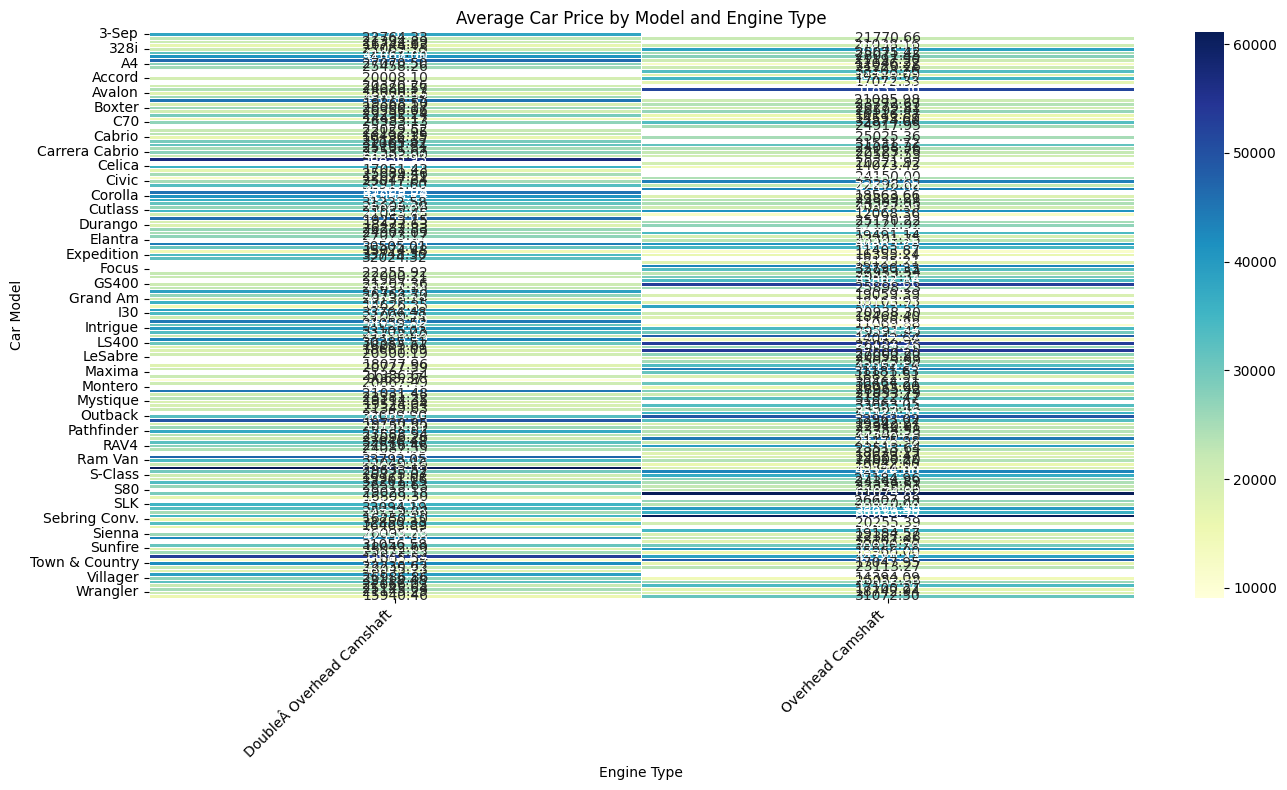

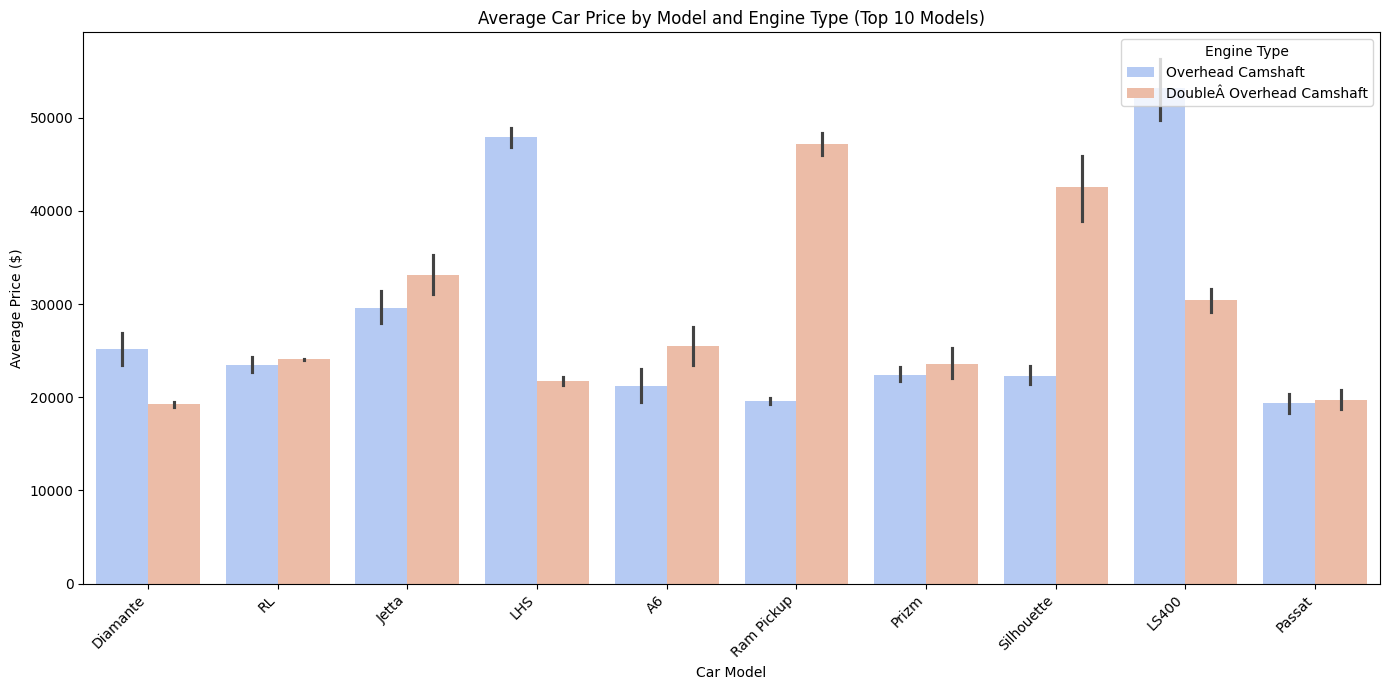

In [20]:

# Q-15  How does the average car price vary across different car models and engine types?

# Analyze average car price across different car models and engine types
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

try:
    # Check if required columns exist in the dataset
    if 'Model' not in data.columns or 'Engine' not in data.columns or 'Price ($)' not in data.columns:
        raise KeyError("Missing required columns ('Model', 'Engine', or 'Price ($)').")

    # Calculate the average price grouped by Model and Engine type
    avg_price_model_engine = data.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
    print("Average Car Prices by Model and Engine Type:")
    print(avg_price_model_engine)

    # Visualize the average prices using a heatmap
    plt.figure(figsize=(14, 8))
    sns.heatmap(avg_price_model_engine, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
    plt.title('Average Car Price by Model and Engine Type')
    plt.xlabel('Engine Type')
    plt.ylabel('Car Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Optional: Use a bar plot to visualize top models with different engine types
    top_models = data['Model'].value_counts().head(10).index  # Select top 10 most frequent models
    filtered_data = data[data['Model'].isin(top_models)]
    plt.figure(figsize=(14, 7))
    sns.barplot(x='Model', y='Price ($)', hue='Engine', data=filtered_data, palette='coolwarm')
    plt.title('Average Car Price by Model and Engine Type (Top 10 Models)')
    plt.xlabel('Car Model')
    plt.ylabel('Average Price ($)')
    plt.legend(title='Engine Type', loc='upper right')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except KeyError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



Average Rating for Each Product Category:
category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Acc

<ipython-input-27-28948558ccb7>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='viridis')
<ipython-input-27-28948558ccb7>:33: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


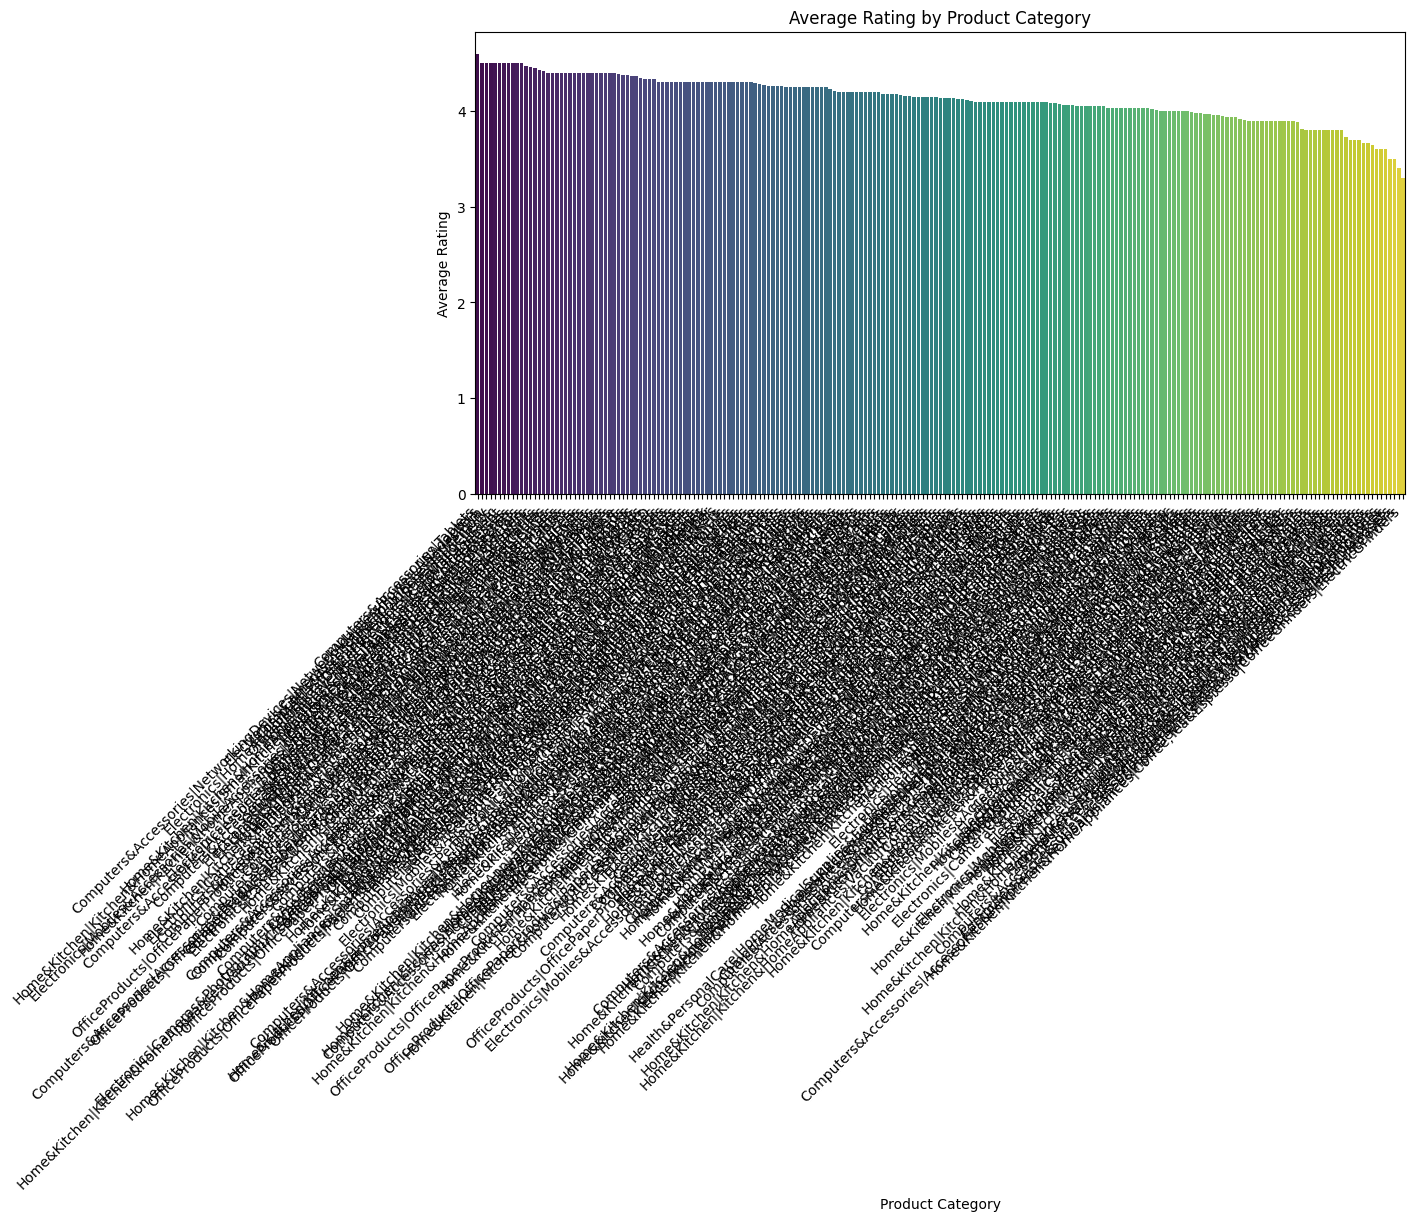

In [27]:

# EDA 3

# Q-1 What is the average rating for each product category?

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert the 'rating' column to numeric
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Ensure required columns are present in the dataset
if 'category' in data.columns and 'rating' in data.columns:
    # Calculate the average rating for each product category
    avg_rating_by_category = data.groupby('category')['rating'].mean().sort_values(ascending=False)

    # Display the results
    print("Average Rating for Each Product Category:")
    print(avg_rating_by_category)

    # Visualize the average ratings using a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_rating_by_category.index, y=avg_rating_by_category.values, palette='viridis')
    plt.title('Average Rating by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'category' and 'rating'.")


In [32]:

# Q-2 What are the top rating_count products by category?

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Ensure required columns are present in the dataset
if 'category' in data.columns and 'rating_count' in data.columns and 'product_name' in data.columns:
    # Convert 'rating_count' to numeric to avoid errors
    data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')

    # Get the top products by rating_count for each category
    top_products_by_category = (
        data.sort_values(by=['category', 'rating_count'], ascending=[True, False])
        .groupby('category')
        .head(1)  # Fetch the top product for each category
    )

    # Display the results
    print("Top Products by Rating Count for Each Category:")
    print(top_products_by_category[['category', 'product_name', 'rating_count']])
else:
    print("The dataset does not contain the required columns: 'category', 'rating_count', or 'product_name'.")

Top Products by Rating Count for Each Category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
748   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name  rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...           NaN  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...           NaN  
906   Hp Wired On Ear Headp

<ipython-input-31-a0fc212087e9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price Type', y='Price', data=melted_data, palette='coolwarm')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

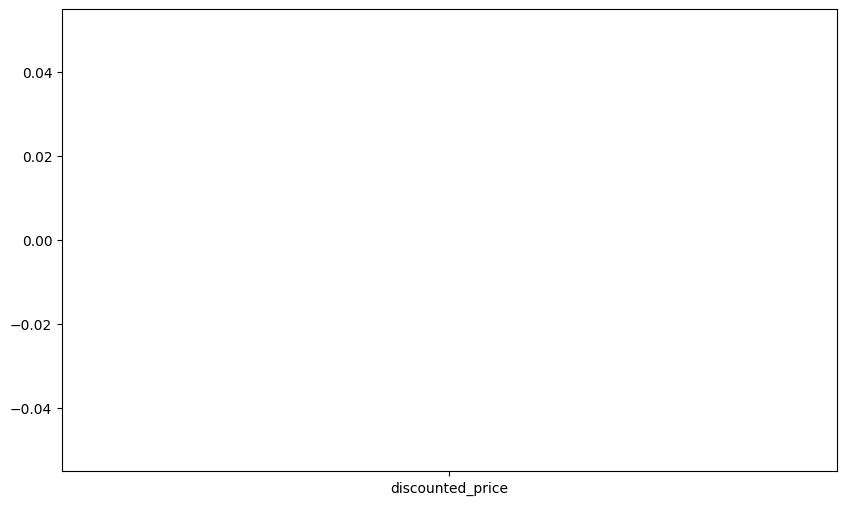

In [31]:


# Q-3 What is the distribution of discounted prices vs. actual prices?

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'discounted_price' and 'actual_price' to numeric to handle any inconsistencies
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')

# Melt the data for proper boxplot format
melted_data = data[['discounted_price', 'actual_price']].melt(var_name='Price Type', value_name='Price')

# Visualize the spread of discounted vs actual prices using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Type', y='Price', data=melted_data, palette='coolwarm')
plt.title('Box Plot of Discounted Prices vs Actual Prices')
plt.ylabel('Price')
plt.xlabel('Price Type')
plt.tight_layout()
plt.show()



Average Discount Percentage for Each Category:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                   NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                  NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                          NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                       NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                          NaN
                                                                                                                          ..
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens       NaN
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&Writ

<ipython-input-33-d5778de95bcc>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_discount_by_category.index, y=avg_discount_by_category.values, palette='coolwarm')
<ipython-input-33-d5778de95bcc>:31: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


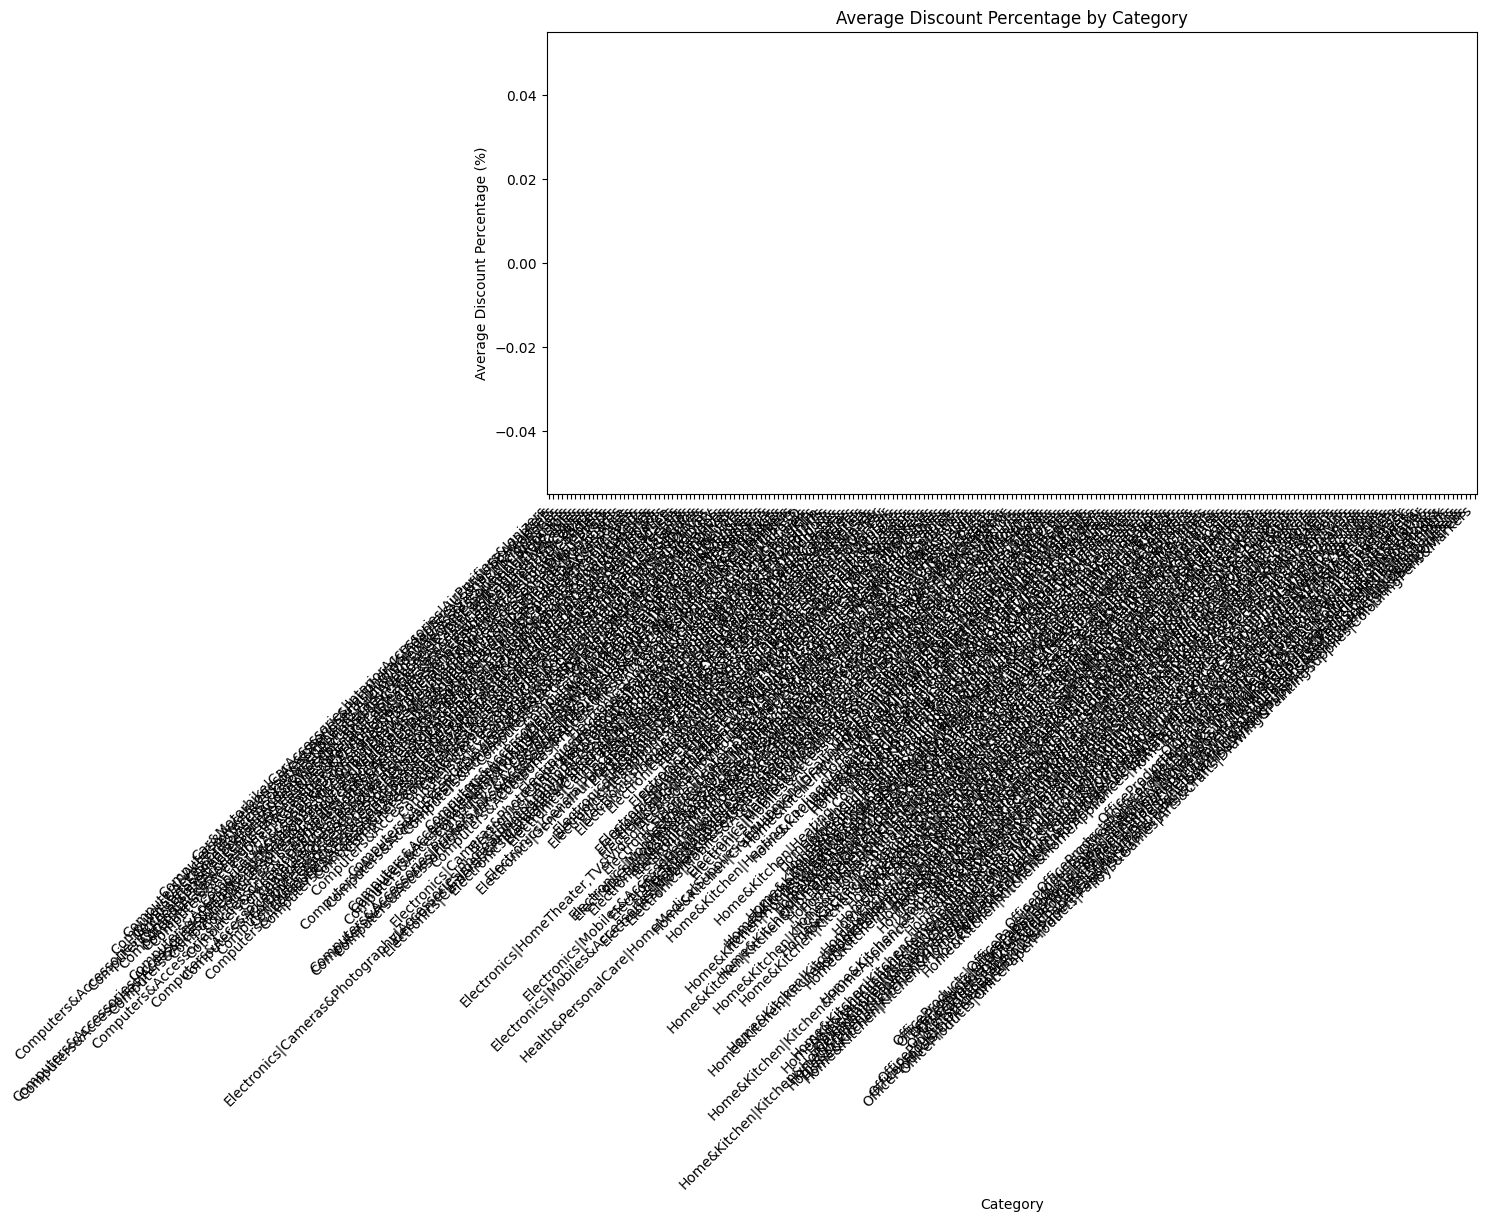

In [33]:

#Q-4 How does the average discount percentage vary across categories?

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'discount_percentage' to numeric to handle any inconsistencies
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')

# Check for required columns
if 'category' in data.columns and 'discount_percentage' in data.columns:
    # Calculate the average discount percentage for each category
    avg_discount_by_category = data.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

    # Display the results
    print("Average Discount Percentage for Each Category:")
    print(avg_discount_by_category)

    # Visualize the average discount percentage using a bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_discount_by_category.index, y=avg_discount_by_category.values, palette='coolwarm')
    plt.title('Average Discount Percentage by Category')
    plt.xlabel('Category')
    plt.ylabel('Average Discount Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'category' and 'discount_percentage'.")


In [34]:

# Q -5  What are the most popular product names?

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Check if 'product_name' column exists
if 'product_name' in data.columns:
    # Calculate the frequency of each product name
    product_popularity = data['product_name'].value_counts().head(10)

    # Display the results
    print("Most Popular Product Names:")
    print(product_popularity)
else:
    print("The dataset does not contain the required column: 'product_name'.")


Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                

In [35]:

# Q-6  What are the most popular product keywords?

# Import necessary libraries
import pandas as pd
from collections import Counter

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Check if 'product_name' column exists
if 'product_name' in data.columns:
    # Split product names into individual keywords
    all_keywords = data['product_name'].str.split(expand=True).stack()

    # Count keyword frequencies
    keyword_counts = Counter(all_keywords)

    # Get the top 10 most frequent keywords
    most_popular_keywords = keyword_counts.most_common(10)

    # Display the results
    print("Most Popular Product Keywords:")
    for keyword, count in most_popular_keywords:
        print(f"{keyword}: {count}")
else:
    print("The dataset does not contain the required column: 'product_name'.")


Most Popular Product Keywords:
with: 718
for: 614
|: 457
&: 432
USB: 342
and: 310
Cable: 306
-: 220
Charging: 212
Fast: 208


In [36]:

#Q-7  What are the most popular product reviews?

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Check if 'review_title' column exists
if 'review_title' in data.columns:
    # Calculate the frequency of each review title
    popular_reviews = data['review_title'].value_counts().head(10)

    # Display the results
    print("Most Popular Product Reviews:")
    print(popular_reviews)
else:
    print("The dataset does not contain the required column: 'review_title'.")


Most Popular Product Reviews:
review_title
Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.                                                                                                                                     10
Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good                                                                                                                                                                     8
Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good                                  8
A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super 

The correlation between discounted_price and rating is: nan


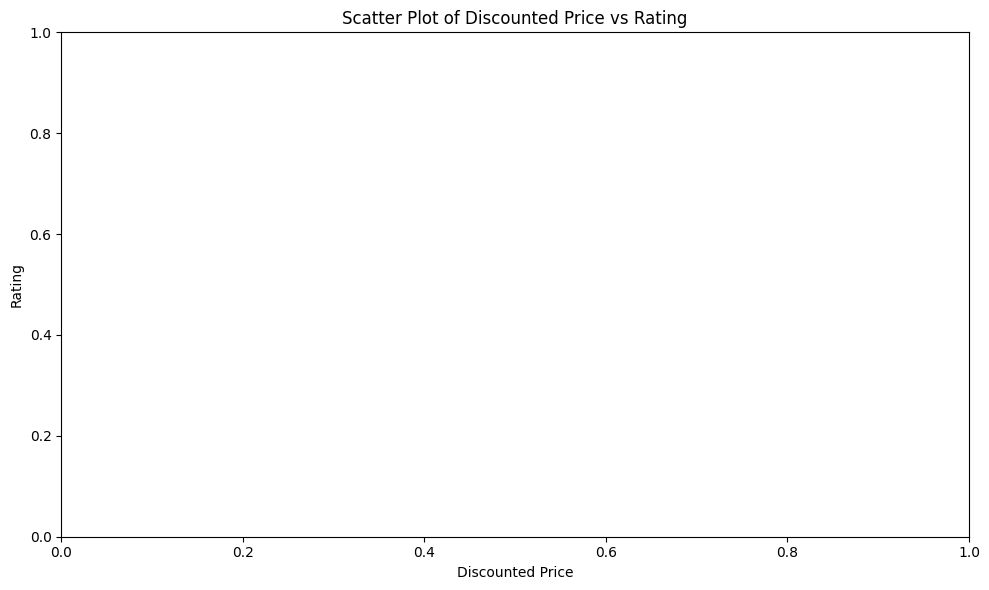

In [37]:

# Q-8 What is the correlation between discounted_price and rating?

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'discounted_price' and 'rating' to numeric to handle inconsistencies
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Check if the required columns exist
if 'discounted_price' in data.columns and 'rating' in data.columns:
    # Calculate the Pearson correlation coefficient
    correlation = data[['discounted_price', 'rating']].corr().iloc[0, 1]
    print(f"The correlation between discounted_price and rating is: {correlation:.2f}")

    # Visualize the relationship with a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='discounted_price', y='rating', data=data, alpha=0.6, color='blue')
    plt.title('Scatter Plot of Discounted Price vs Rating')
    plt.xlabel('Discounted Price')
    plt.ylabel('Rating')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'discounted_price' and 'rating'.")


In [38]:

# Q-9  What are the Top 5 categories based on the highest ratings?

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/amazon.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'rating' to numeric to handle any inconsistencies
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Check if 'category' and 'rating' columns exist
if 'category' in data.columns and 'rating' in data.columns:
    # Calculate the average rating for each category
    avg_rating_by_category = data.groupby('category')['rating'].mean().sort_values(ascending=False)

    # Get the top 5 categories based on the highest ratings
    top_5_categories = avg_rating_by_category.head(5)

    # Display the results
    print("Top 5 Categories Based on Highest Ratings:")
    print(top_5_categories)
else:
    print("The dataset does not contain the required columns: 'category' and 'rating'.")


Top 5 Categories Based on Highest Ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


In [39]:

# Q-10  Identify any potential areas for improvement or optimization based on the data analysis.

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/amazon.csv"  # Replace with the path to your dataset
data = pd.read_csv(file_path)

# Convert necessary columns to numeric format to handle inconsistencies
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'], errors='coerce')
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')

# Check for improvement opportunities based on existing analyses
def identify_improvements(data):
    improvements = {}

    # Discount Analysis: Categories with the highest average discounts
    if 'category' in data.columns and 'discount_percentage' in data.columns:
        avg_discount = data.groupby('category')['discount_percentage'].mean()
        improvements['High Discount Categories'] = avg_discount.sort_values(ascending=False).head(5)

    # Rating Analysis: Categories with the lowest average ratings
    if 'category' in data.columns and 'rating' in data.columns:
        avg_rating = data.groupby('category')['rating'].mean()
        improvements['Low Rating Categories'] = avg_rating.sort_values(ascending=True).head(5)

    # Popular Products: Top-rated products based on rating count
    if 'product_name' in data.columns and 'rating_count' in data.columns:
        top_products = data.sort_values(by='rating_count', ascending=False)[['product_name', 'rating_count']].head(5)
        improvements['Top Products by Rating Count'] = top_products

    # Price vs Rating Correlation
    if 'discounted_price' in data.columns and 'rating' in data.columns:
        correlation = data[['discounted_price', 'rating']].corr().iloc[0, 1]
        improvements['Discounted Price vs Rating Correlation'] = correlation

    # Price Discrepancy: Analyze variation between actual and discounted prices
    if 'discounted_price' in data.columns and 'actual_price' in data.columns:
        price_discrepancy = (data['actual_price'] - data['discounted_price']).describe()
        improvements['Price Discrepancy Summary'] = price_discrepancy

    return improvements

# Identify areas for improvement
improvement_areas = identify_improvements(data)

# Display the results
for area, insights in improvement_areas.items():
    print(f"\n{area}:")
    print(insights)



High Discount Categories:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers               NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters              NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets      NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones   NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers      NaN
Name: discount_percentage, dtype: float64

Low Rating Categories:
category
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets              

In [40]:


# EDA -4

# Q-1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/spotify.csv"  # Updated file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())

# Check for null values
print("\nChecking for Null Values:")
null_values = data.isnull().sum()
print(null_values)

# Handling null values
# You can choose to drop rows or fill them with a value (e.g., "Unknown")
if null_values.sum() > 0:
    print("\nHandling Null Values:")
    data = data.fillna("Unknown")  # Example: Replace null values with "Unknown"
    # Alternatively, you can use data.dropna() to remove rows with null values
    print("Null values filled or removed.")

# Check for duplicate rows
print("\nChecking for Duplicate Rows:")
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Handling duplicate rows
if duplicate_rows > 0:
    print("\nHandling Duplicate Rows:")
    data = data.drop_duplicates()
    print("Duplicate rows removed.")

# Display the first few rows of the cleaned dataset
print("\nCleaned Dataset Preview:")
print(data.head())

# Save the cleaned dataset (optional)
cleaned_file_path = "/content/cleaned_spotify_data.csv"  # Save location for cleaned data
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB
None

Checking for Null Values:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Checking for Duplicate Rows:
Number of duplicate rows: 27

Handling Duplicate Rows:
Duplicate rows removed.

Cleaned Dataset Preview:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake   

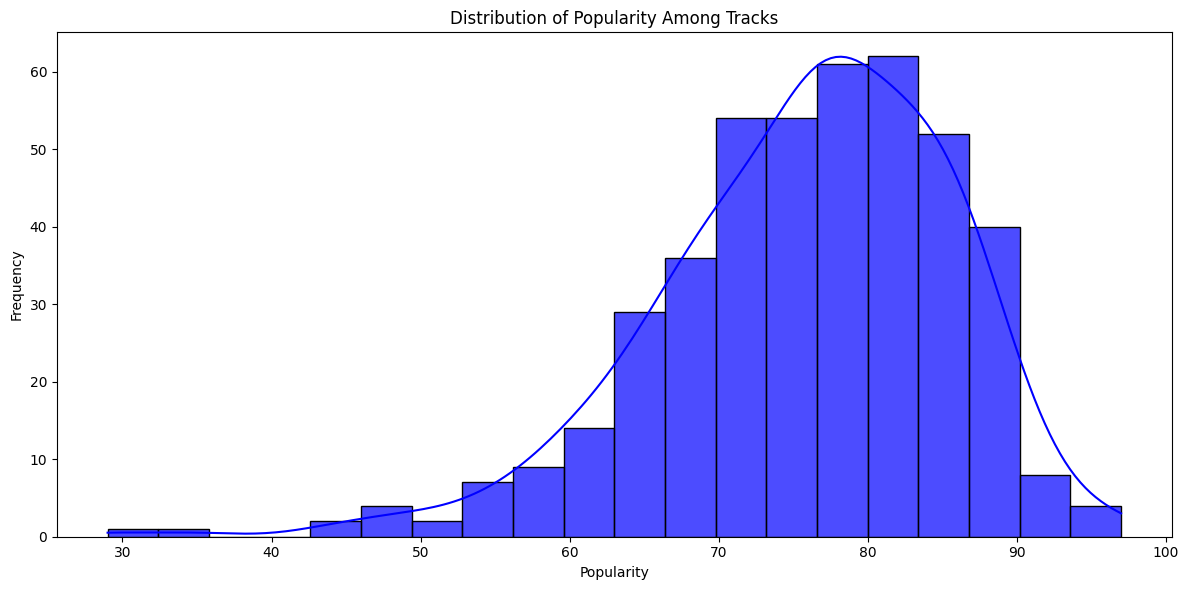

In [42]:

# Q-2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' to numeric to handle any inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Check for required column
if 'Popularity' in data.columns:
    # Plot the distribution of Popularity using a histogram
    plt.figure(figsize=(12, 6))
    sns.histplot(data['Popularity'], bins=20, kde=True, color='blue', alpha=0.7)
    plt.title('Distribution of Popularity Among Tracks')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required column: 'Popularity'.")


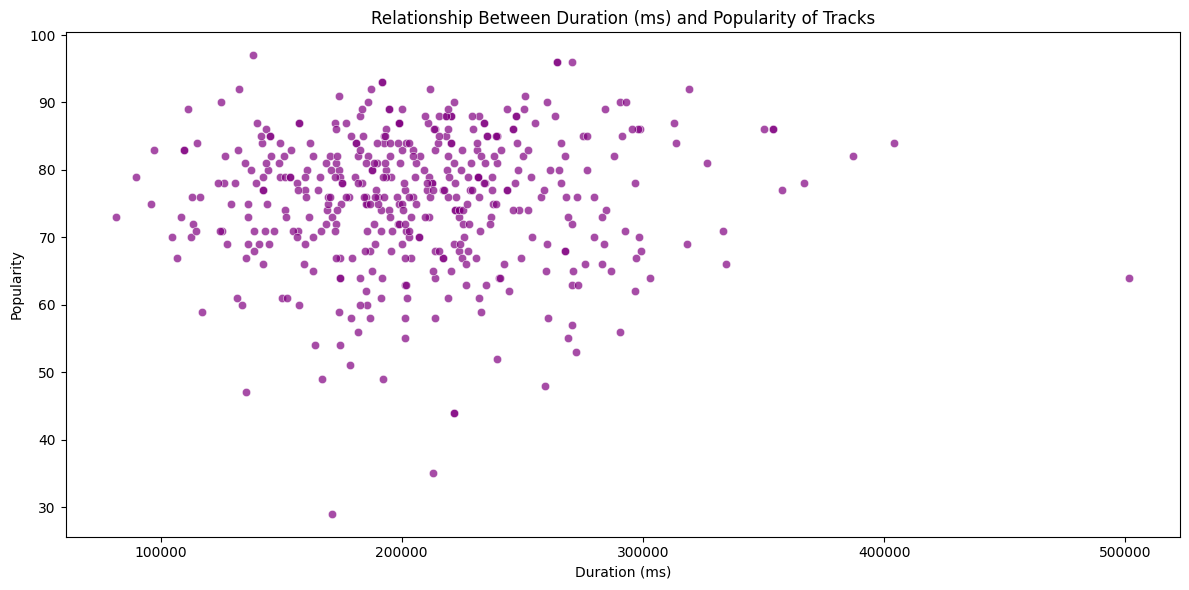

In [43]:

# Q-3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' and 'Duration (ms)' to numeric to handle inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')
data['Duration (ms)'] = pd.to_numeric(data['Duration (ms)'], errors='coerce')

# Check for required columns
if 'Popularity' in data.columns and 'Duration (ms)' in data.columns:
    # Plot the relationship using a scatter plot
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Duration (ms)', y='Popularity', data=data, alpha=0.7, color='purple')
    plt.title('Relationship Between Duration (ms) and Popularity of Tracks')
    plt.xlabel('Duration (ms)')
    plt.ylabel('Popularity')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'Popularity' and 'Duration (ms)'.")


The artist with the highest number of tracks is: Drake (20 tracks)


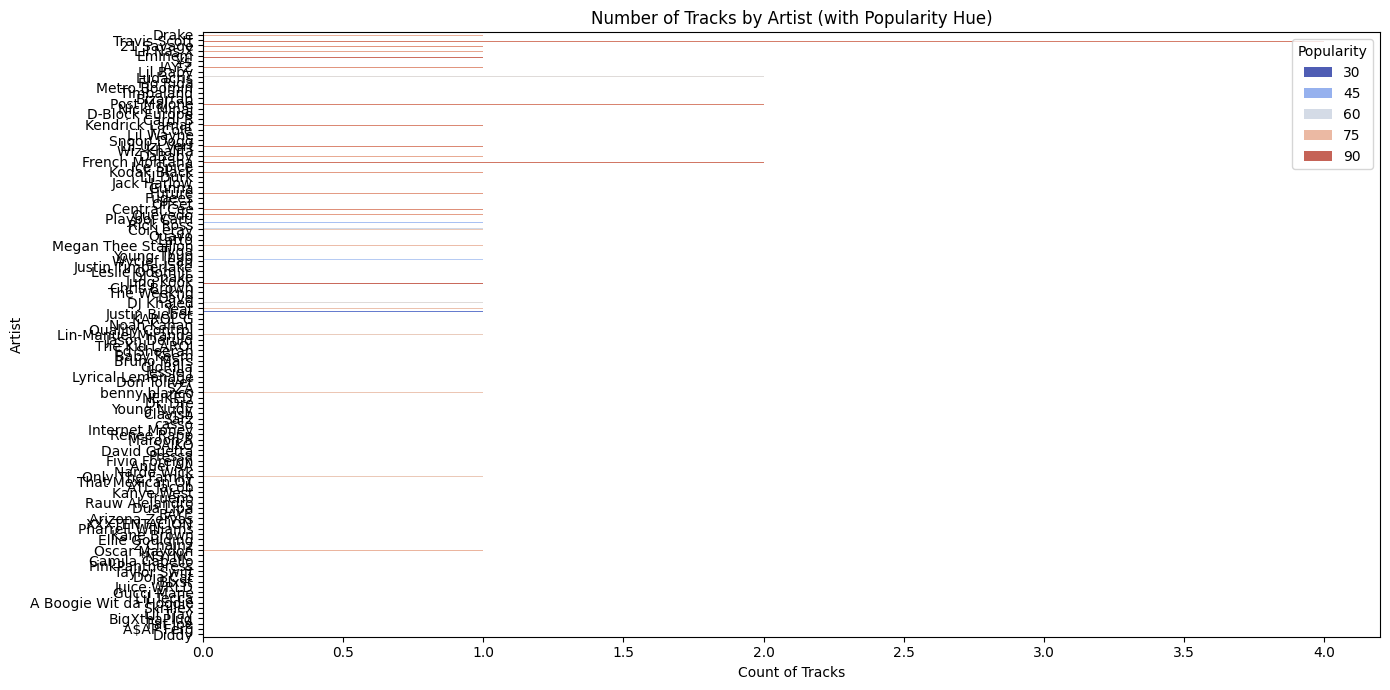

In [45]:
# Q -4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Check if the required columns exist
if 'Artist' in data.columns and 'Popularity' in data.columns:
    # Count the number of tracks for each artist
    track_counts = data['Artist'].value_counts()

    # Identify the artist with the highest number of tracks
    top_artist = track_counts.idxmax()
    top_artist_count = track_counts.max()
    print(f"The artist with the highest number of tracks is: {top_artist} ({top_artist_count} tracks)")

    # Visualize the count of tracks for each artist using a countplot with hue
    plt.figure(figsize=(14, 7))
    sns.countplot(y='Artist', hue='Popularity', data=data, order=data['Artist'].value_counts().index, palette='coolwarm')
    plt.title('Number of Tracks by Artist (with Popularity Hue)')
    plt.xlabel('Count of Tracks')
    plt.ylabel('Artist')
    plt.legend(title='Popularity', loc='upper right')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'Artist' or 'Popularity'.")



In [46]:

# Q-5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' to numeric to handle inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Check if the required columns exist
if 'Popularity' in data.columns and 'Artist' in data.columns and 'Track Name' in data.columns:
    # Sort the dataset by popularity in ascending order
    least_popular_tracks = data.sort_values(by='Popularity', ascending=True).head(5)

    # Display the artist name and track name for the top 5 least popular tracks
    print("Top 5 Least Popular Tracks in the Dataset:")
    for index, row in least_popular_tracks.iterrows():
        print(f"Artist: {row['Artist']}, Track Name: {row['Track Name']}, Popularity: {row['Popularity']}")
else:
    print("The dataset does not contain the required columns: 'Popularity', 'Artist', or 'Track Name'.")


Top 5 Least Popular Tracks in the Dataset:
Artist: Pressa, Track Name: Attachments (feat. Coi Leray), Popularity: 29
Artist: Justin Bieber, Track Name: Intentions, Popularity: 35
Artist: French Montana, Track Name: Splash Brothers, Popularity: 44
Artist: French Montana, Track Name: Splash Brothers, Popularity: 44
Artist: Lil Baby, Track Name: On Me - Remix, Popularity: 47


In [47]:

# Q-6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.


# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' to numeric to handle inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Check if the required columns exist
if 'Popularity' in data.columns and 'Artist' in data.columns:
    # Calculate the average popularity for each artist
    avg_popularity_by_artist = data.groupby('Artist')['Popularity'].mean()

    # Identify the top 5 most popular artists based on average popularity
    top_5_artists = avg_popularity_by_artist.sort_values(ascending=False).head(5)

    # Display the average popularity for each artist
    print("Average Popularity for the Top 5 Most Popular Artists:")
    print(top_5_artists)

    # Identify the artist with the highest average popularity
    most_popular_artist = top_5_artists.idxmax()
    highest_avg_popularity = top_5_artists.max()
    print(f"\nThe artist with the highest average popularity is: {most_popular_artist} ({highest_avg_popularity:.2f})")
else:
    print("The dataset does not contain the required columns: 'Popularity' and 'Artist'.")


Average Popularity for the Top 5 Most Popular Artists:
Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    87.000000
¥$              86.090909
Name: Popularity, dtype: float64

The artist with the highest average popularity is: cassö (92.00)


In [48]:

# Q -7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' to numeric to handle inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Check if the required columns exist
if 'Popularity' in data.columns and 'Artist' in data.columns and 'Track Name' in data.columns:
    # Step 1: Calculate the average popularity for each artist
    avg_popularity_by_artist = data.groupby('Artist')['Popularity'].mean()

    # Step 2: Identify the top 5 most popular artists based on average popularity
    top_5_artists = avg_popularity_by_artist.sort_values(ascending=False).head(5).index

    # Step 3: Find the most popular track for each of the top 5 artists
    most_popular_tracks = {}
    for artist in top_5_artists:
        artist_tracks = data[data['Artist'] == artist]
        most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]
        most_popular_tracks[artist] = most_popular_track['Track Name']

    # Display the results
    print("Most Popular Tracks for the Top 5 Most Popular Artists:")
    for artist, track_name in most_popular_tracks.items():
        print(f"Artist: {artist}, Track Name: {track_name}")
else:
    print("The dataset does not contain the required columns: 'Popularity', 'Artist', or 'Track Name'.")


Most Popular Tracks for the Top 5 Most Popular Artists:
Artist: cassö, Track Name: Prada
Artist: Trueno, Track Name: Mamichula - con Nicki Nicole
Artist: David Guetta, Track Name: Baby Don't Hurt Me
Artist: Travis Scott, Track Name: FE!N (feat. Playboi Carti)
Artist: ¥$, Track Name: CARNIVAL


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


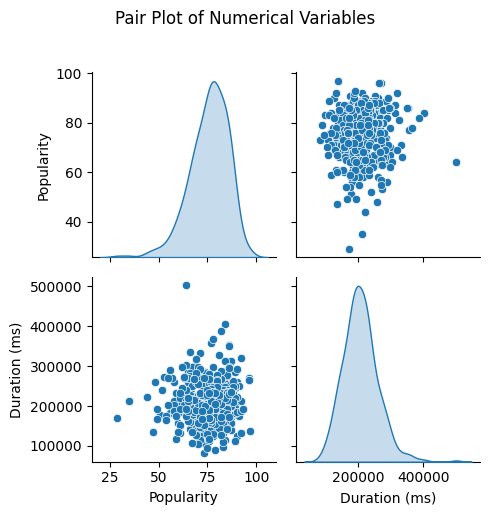

In [49]:

# Q-8 Visualize relationships between multiple numerical variables simultaneously using a pair plot.

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert relevant columns to numeric to handle inconsistencies
numerical_columns = ['Popularity', 'Duration (ms)']
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Check if required numerical columns exist
if all(column in data.columns for column in numerical_columns):
    # Pair plot to visualize relationships between numerical variables
    sns.pairplot(data=data[numerical_columns], diag_kind='kde', palette='coolwarm')
    plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print(f"The dataset does not contain the required numerical columns: {numerical_columns}")


<ipython-input-50-27a9288e4259>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=subset_data, palette='coolwarm')


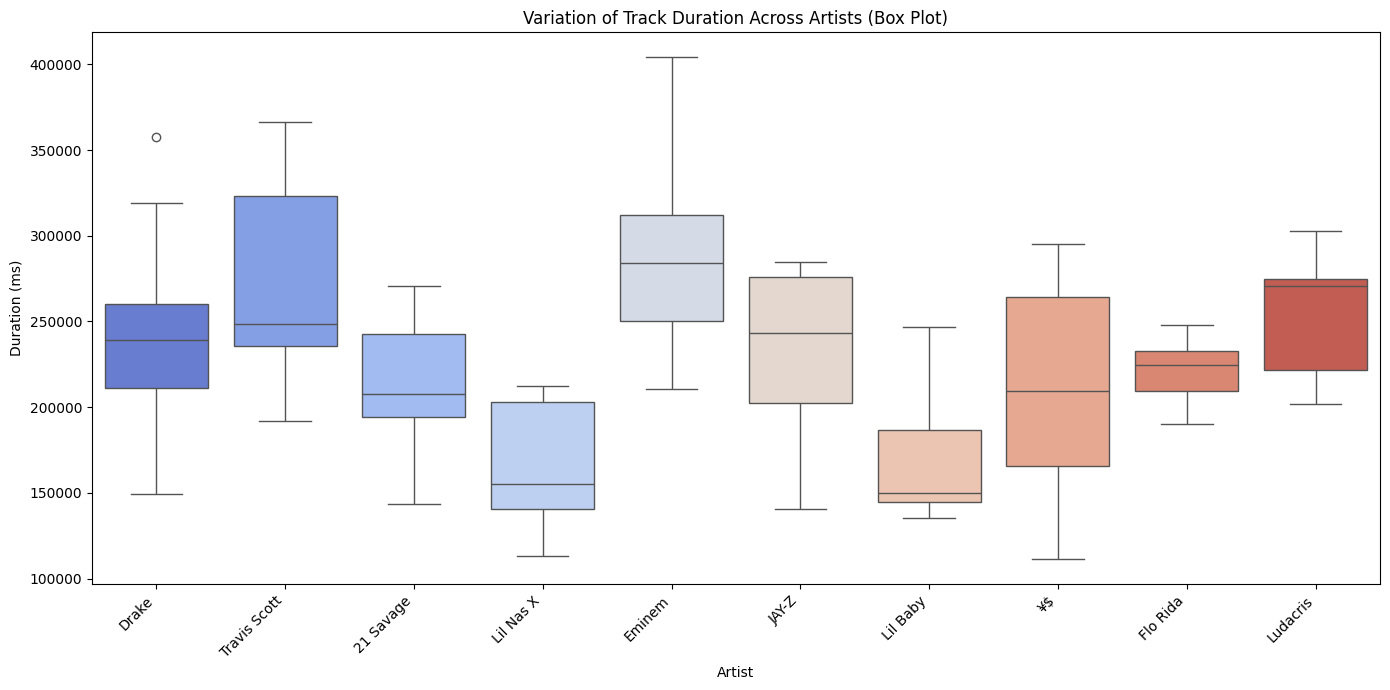

<ipython-input-50-27a9288e4259>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Duration (ms)', data=subset_data, palette='coolwarm', inner='quartile')


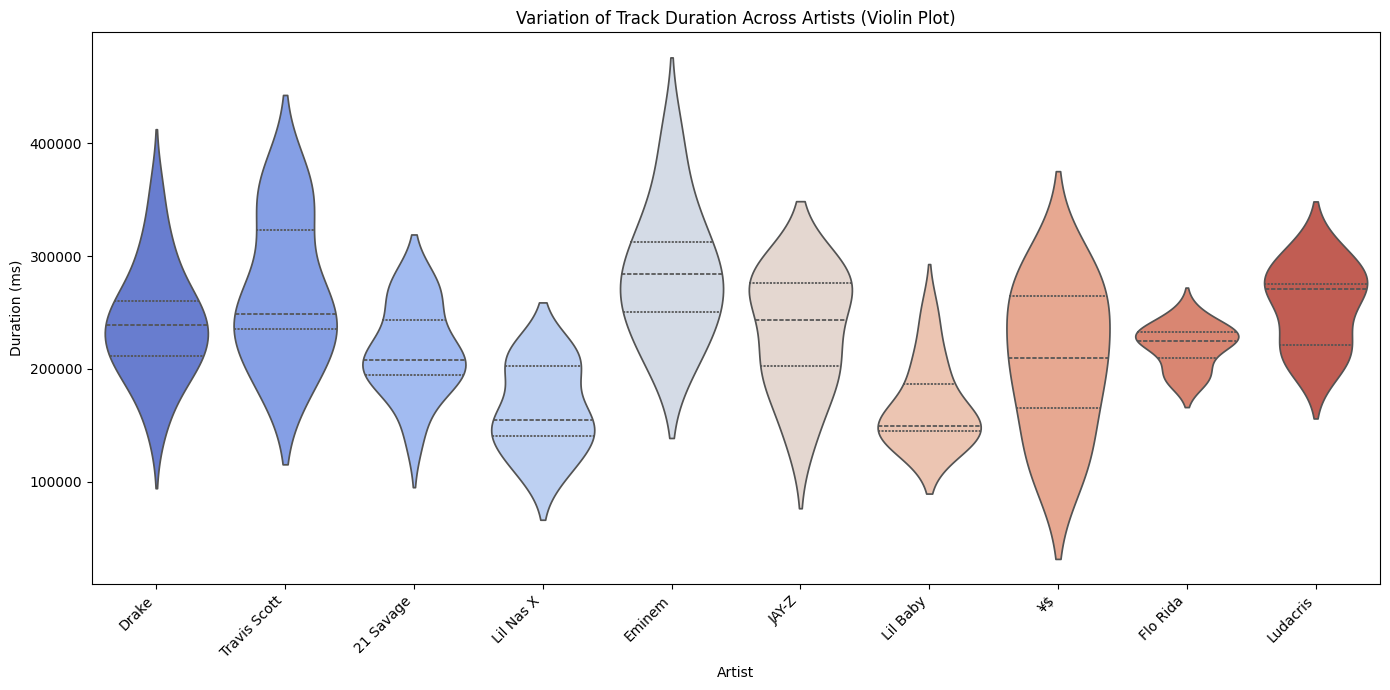

In [50]:

# Q-9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Duration (ms)' to numeric to handle inconsistencies
data['Duration (ms)'] = pd.to_numeric(data['Duration (ms)'], errors='coerce')

# Check if required columns exist
if 'Duration (ms)' in data.columns and 'Artist' in data.columns:
    # Select a subset of artists to make the plot easier to read (e.g., top 10 artists with most tracks)
    top_artists = data['Artist'].value_counts().head(10).index
    subset_data = data[data['Artist'].isin(top_artists)]

    # Visualize the duration of tracks across different artists using a box plot
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Artist', y='Duration (ms)', data=subset_data, palette='coolwarm')
    plt.title('Variation of Track Duration Across Artists (Box Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Duration (ms)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualize the duration of tracks across different artists using a violin plot
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Artist', y='Duration (ms)', data=subset_data, palette='coolwarm', inner='quartile')
    plt.title('Variation of Track Duration Across Artists (Violin Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Duration (ms)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'Duration (ms)' or 'Artist'.")


<ipython-input-51-0e4245293487>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=subset_data, palette='coolwarm', inner='quartile')


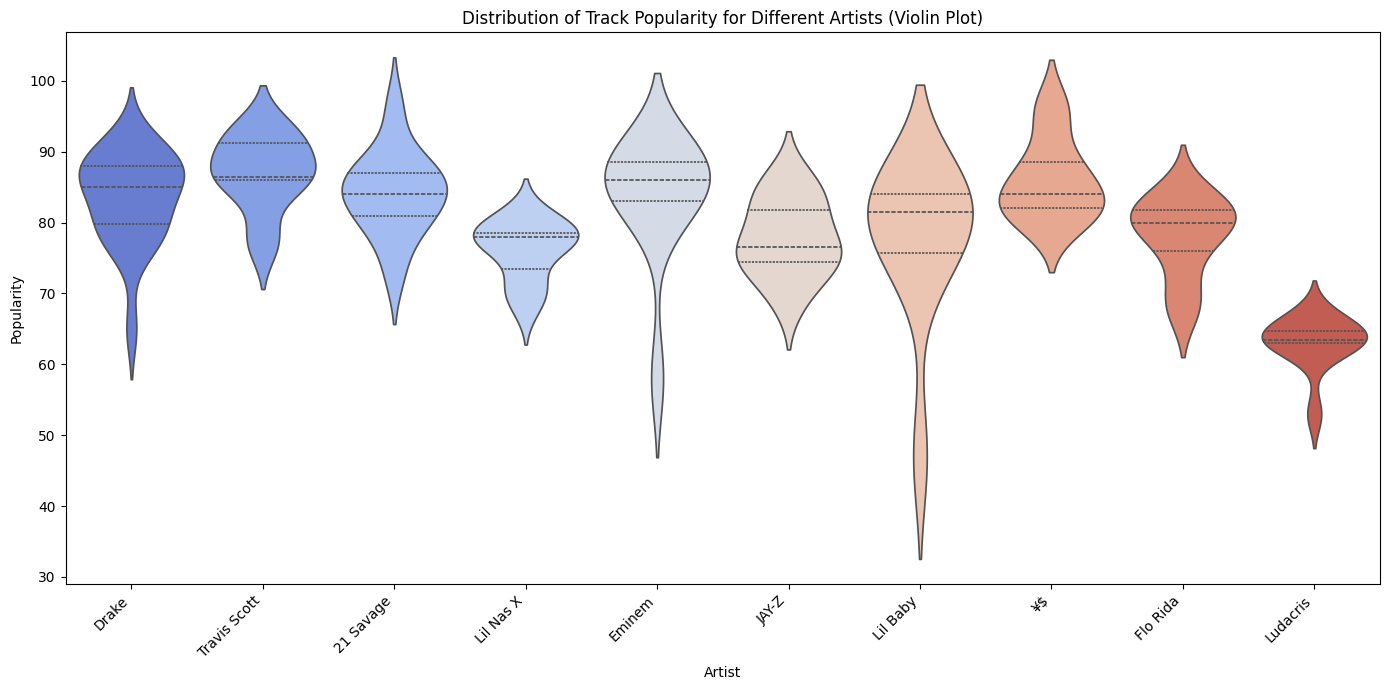

<ipython-input-51-0e4245293487>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Artist', y='Popularity', data=subset_data, palette='viridis', alpha=0.7)


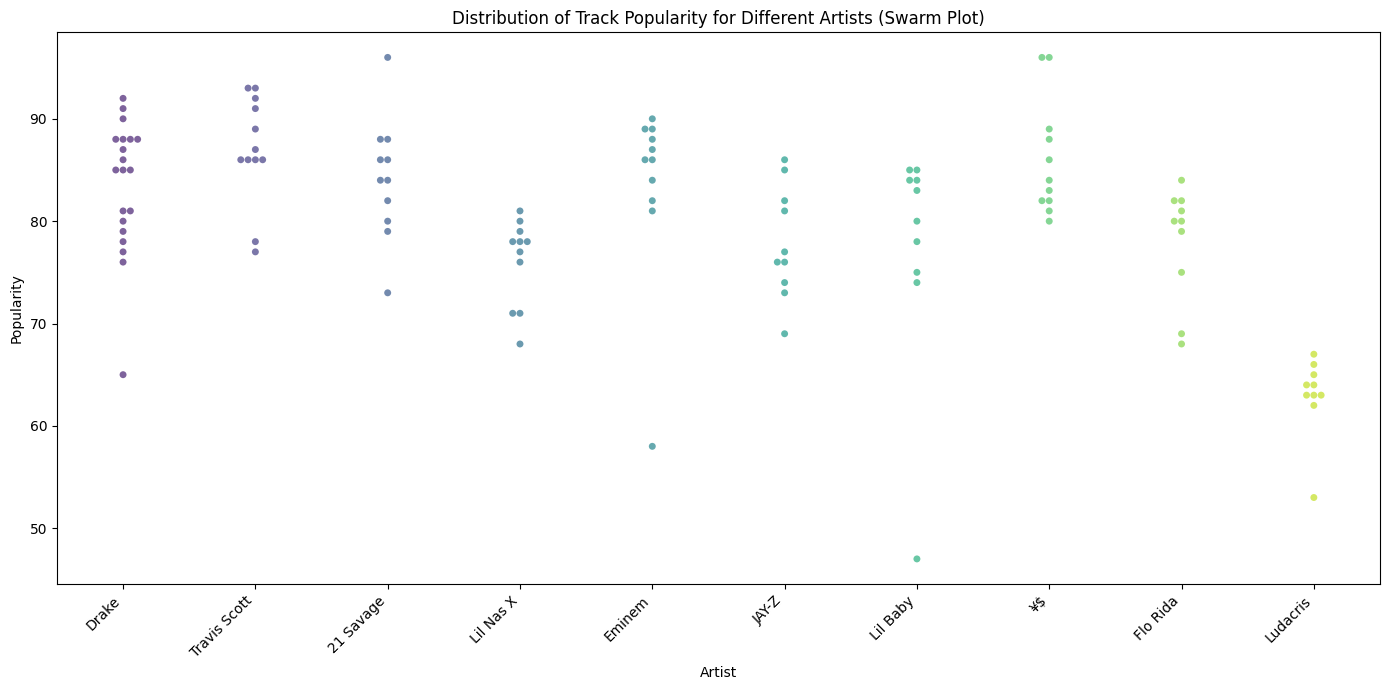

In [51]:

# Q-10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/spotify.csv"  # File path to the dataset
data = pd.read_csv(file_path)

# Convert 'Popularity' to numeric to handle inconsistencies
data['Popularity'] = pd.to_numeric(data['Popularity'], errors='coerce')

# Check if required columns exist
if 'Popularity' in data.columns and 'Artist' in data.columns:
    # Select a subset of artists for better visualization (e.g., top 10 artists with most tracks)
    top_artists = data['Artist'].value_counts().head(10).index
    subset_data = data[data['Artist'].isin(top_artists)]

    # Visualize the distribution of popularity using a violin plot
    plt.figure(figsize=(14, 7))
    sns.violinplot(x='Artist', y='Popularity', data=subset_data, palette='coolwarm', inner='quartile')
    plt.title('Distribution of Track Popularity for Different Artists (Violin Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Visualize the distribution of popularity using a swarm plot
    plt.figure(figsize=(14, 7))
    sns.swarmplot(x='Artist', y='Popularity', data=subset_data, palette='viridis', alpha=0.7)
    plt.title('Distribution of Track Popularity for Different Artists (Swarm Plot)')
    plt.xlabel('Artist')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The dataset does not contain the required columns: 'Popularity' or 'Artist'.")
